In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import warnings
warnings.filterwarnings("ignore")


In [3]:
import numpy as np
import pandas as pd 

In [4]:
import sys
sys.path.append('../../../')

In [5]:
import matplotlib.pyplot as plt 

In [6]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


In [7]:
from src.utils.dates import get_nyse_business_dates

In [8]:
from research.metrics import get_features_responses_correlation
from research.plots import plot_bin_summary_of_xy

In [9]:
from src.settings import Settings

In [10]:
from src.utils.io.read import PreprocessedDataReader

In [11]:
from src.preprocessing.base import FutureTicker

In [12]:
pdr = PreprocessedDataReader(Settings.historical.paths.PREPROCESSED_DATA_PATH)                    

In [13]:
dataset = pdr.read_dataset(ticker=FutureTicker.HEATING_OIL)

In [14]:
dataset.shape

(809, 81)

In [15]:
dataset.tail(2)

,tradeDate,Name,Commercial_NetPosition,CommercialLongPosition,CommercialShortPosition,ManagedMoney_NetPosition,ManagedMoney_LongPosition,ManagedMoney_ShortPosition,Commercial_NetPosition_change,prior_report_Commercial_NetPosition_change,...,prior_cumulative_5D_F2_Volume_change,next_prior_cumulative_5D_F2_Volume_change,prior_cumulative_5D_F1MinusF2_Volume_change,next_prior_cumulative_5D_F1MinusF2_Volume_change,F1_RolledPrice_change,next_F1_RolledPrice_change,F2_RolledPrice_change,next_F2_RolledPrice_change,F3_RolledPrice_change,next_F3_RolledPrice_change
807,2025-06-24,HO,-101062.0,60660.0,161722.0,10738.0,52627.0,41889.0,-6949.0,-1096.0,...,116650.0,-221825.0,-247835.0,104997.0,-22.00,10.81,-22.15,5.59,-22.31,4.55
808,2025-07-01,HO,-104727.0,71449.0,176176.0,12898.0,54458.0,41560.0,-3665.0,-6949.0,...,-221825.0,NaN,104997.0,NaN,10.81,NaN,5.59,NaN,4.55,NaN


In [16]:
dataset.columns.tolist()

['tradeDate',
 'Name',
 'Commercial_NetPosition',
 'CommercialLongPosition',
 'CommercialShortPosition',
 'ManagedMoney_NetPosition',
 'ManagedMoney_LongPosition',
 'ManagedMoney_ShortPosition',
 'Commercial_NetPosition_change',
 'prior_report_Commercial_NetPosition_change',
 'forward_report_Commercial_NetPosition_change',
 'CommercialLongPosition_change',
 'prior_report_CommercialLongPosition_change',
 'forward_report_CommercialLongPosition_change',
 'CommercialShortPosition_change',
 'prior_report_CommercialShortPosition_change',
 'forward_report_CommercialShortPosition_change',
 'ManagedMoney_NetPosition_change',
 'prior_report_ManagedMoney_NetPosition_change',
 'forward_report_ManagedMoney_NetPosition_change',
 'ManagedMoney_LongPosition_change',
 'prior_report_ManagedMoney_LongPosition_change',
 'forward_report_ManagedMoney_LongPosition_change',
 'ManagedMoney_ShortPosition_change',
 'prior_report_ManagedMoney_ShortPosition_change',
 'forward_report_ManagedMoney_ShortPosition_chan

In [17]:
dataset['Commercial_NetPosition'].describe()

count       809.000000
mean     -88936.087763
std       27763.539642
min     -159660.000000
25%     -107553.000000
50%      -87631.000000
75%      -69721.000000
max      -13850.000000
Name: Commercial_NetPosition, dtype: float64

In [18]:
dataset['ManagedMoney_NetPosition'].describe()

count      809.000000
mean     11310.650185
std      20265.543668
min     -34954.000000
25%      -2699.000000
50%      12014.000000
75%      24770.000000
max      67696.000000
Name: ManagedMoney_NetPosition, dtype: float64

In [19]:
np.sum(dataset['ManagedMoney_LongPosition'] <= dataset['ManagedMoney_ShortPosition'])

np.int64(231)

In [20]:
dataset['tradeDate'] = pd.to_datetime(dataset['tradeDate']).dt.date

In [21]:
dataset.sort_values(by = 'tradeDate', ascending = True, inplace=True)

In [22]:
dataset.columns.tolist()

['tradeDate',
 'Name',
 'Commercial_NetPosition',
 'CommercialLongPosition',
 'CommercialShortPosition',
 'ManagedMoney_NetPosition',
 'ManagedMoney_LongPosition',
 'ManagedMoney_ShortPosition',
 'Commercial_NetPosition_change',
 'prior_report_Commercial_NetPosition_change',
 'forward_report_Commercial_NetPosition_change',
 'CommercialLongPosition_change',
 'prior_report_CommercialLongPosition_change',
 'forward_report_CommercialLongPosition_change',
 'CommercialShortPosition_change',
 'prior_report_CommercialShortPosition_change',
 'forward_report_CommercialShortPosition_change',
 'ManagedMoney_NetPosition_change',
 'prior_report_ManagedMoney_NetPosition_change',
 'forward_report_ManagedMoney_NetPosition_change',
 'ManagedMoney_LongPosition_change',
 'prior_report_ManagedMoney_LongPosition_change',
 'forward_report_ManagedMoney_LongPosition_change',
 'ManagedMoney_ShortPosition_change',
 'prior_report_ManagedMoney_ShortPosition_change',
 'forward_report_ManagedMoney_ShortPosition_chan

In [23]:
from research.model_selection.CombinatorialPurgedCV import CombinatorialPurgedCV
from research.model_selection.CombinatorialPurgedCV import cpcv_predict



In [24]:

from sklearn.linear_model import LinearRegression, ElasticNetCV
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor


In [25]:
?CombinatorialPurgedCV

Init signature: CombinatorialPurgedCV(n_partitions: int, k: int, purge_amount: int)
Docstring:     
Combinatorial Purged Cross-Validatpr with Purging

This class identifies training and testing indicies that split the data into train/test sets. It also implements purging to avoid lookahead bias.
Init docstring:
Args:
:param n_partitions: the total number of partitions
:param k: the number of partitions to include in the test set
:param purge_amount: the number of indices to be purged between train/test sets
File:           ~/Documents/Projects/omroot_repos/COTAME/research/model_selection/CombinatorialPurgedCV.py
Type:           type
Subclasses:     

In [26]:
response_names =  ['forward_Commercial_NetPosition_to_openinterest_change',
                    'forward_CommercialLongPosition_to_openinterest_change',
                    'forward_CommercialShortPosition_to_openinterest_change'] 



In [27]:
cv = CombinatorialPurgedCV(n_partitions=10,
                           k=2,
                           purge_amount=10)

In [28]:
import json

In [29]:
with open("ho_cot_comm_forecast_selected_features_by_response.json", "r") as f:
    selected_features_by_response = json.load(f)

In [30]:
selected_features_by_response

{'forward_report_Commercial_NetPosition_change': ['prior_report_CommercialLongPosition_change',
  'prior_report_CommercialLongPosition_to_openinterest_change',
  'prior_report_CommercialShortPosition_change',
  'prior_5D_AGG_OI_change',
  'F1_RolledPrice_change'],
 'forward_report_CommercialLongPosition_change': ['prior_5D_F2_OI_change',
  'prior_5D_F1_OI_change',
  'prior_5D_F1MinusF2_openinterest_change',
  'prior_report_CommercialLongPosition_change',
  'prior_report_Commercial_NetPosition_to_openinterest_change'],
 'forward_report_CommercialShortPosition_change': ['prior_cumulative_5D_F1_Volume_change',
  'prior_5D_F1MinusF2_openinterest_change',
  'prior_report_CommercialShortPosition_change',
  'prior_5D_AGG_OI_change',
  'F1_RolledPrice_change'],
 'forward_Commercial_NetPosition_to_openinterest_change': ['prior_cumulative_5D_F2_Volume_change',
  'prior_cumulative_5D_F1_Volume_change',
  'prior_5D_F1MinusF2_openinterest_change',
  'F1_RolledPrice_change'],
 'forward_CommercialLon

In [31]:
from src.preprocessing.base import Winsorizer

In [32]:
import numpy as np
import pandas as pd
from scipy.stats.mstats import winsorize
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [33]:
from sklearn.linear_model import SGDRegressor, Lasso, LinearRegression, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, HistGradientBoostingRegressor

estimators_  = {
    # Elastic-net via SGD (fast, online)
    "enet": SGDRegressor(
        penalty="elasticnet",
        alpha=1e-4,
        l1_ratio=0.15,
        loss="squared_error",   # or "huber" for robustness
        max_iter=1000,
        tol=1e-3,
        random_state=42
    ),
    # Classic L1 / OLS / L2
    "lasso": Lasso(alpha=1.0, random_state=42),
    "ols": LinearRegression(),
    "ridge": Ridge(alpha=1.0, random_state=42),

    # Tree-based regressors
    "rf": RandomForestRegressor(n_estimators=250, max_depth=10, random_state=42),
    "extra": ExtraTreesRegressor(n_estimators=250, max_depth=10, random_state=42),
    "hgbm": HistGradientBoostingRegressor(max_iter=150, learning_rate=0.001, random_state=42),
}


In [34]:
from __future__ import annotations
import numpy as np
import optuna
from optuna import pruners
from research.model_selection.evaluation import find_best_model

responses_best_model = {}
responses_best_params = {}
responses_study = {}
responses_best_per_model = {}

for (response_name, feature_names) in selected_features_by_response.items():
    best_model, best_params, study, best_per_model = find_best_model(
                        Xy=dataset,
                        feature_names=feature_names,
                        response_name=response_name,
                        cv=cv,
                        n_trials=80,         # bump this as you like
                        n_jobs_cpcv=10,
                        seed=42
                    )
    responses_best_model[response_name]=best_model
    responses_best_params[response_name]=best_params
    responses_study[response_name]=study
    responses_best_per_model[response_name]=best_per_model
    
    print("Overall Best Params:", best_params)
    print("\nBest Per Model:")
    for model, info in best_per_model.items():
        print(f"{model}: score={info['score']:.4f}, params={info['params']}")

[I 2025-08-20 20:10:21,218] A new study created in memory with name: no-name-95fc0dc0-03b7-427f-8499-17bbe2af0a64
Best trial: 0. Best value: 0.152179:   1%|       | 1/80 [00:01<01:44,  1.33s/it]

[I 2025-08-20 20:10:22,550] Trial 0 finished with value: 0.1521792882739052 and parameters: {'model': 'lasso', 'alpha': 1.156732719914599}. Best is trial 0 with value: 0.1521792882739052.
[I 2025-08-20 20:10:22,581] Trial 1 finished with value: 0.1520883296729935 and parameters: {'model': 'ridge', 'alpha': 4.473429410462694e-05}. Best is trial 0 with value: 0.1521792882739052.


Best trial: 2. Best value: 0.224701:   4%|▎      | 3/80 [00:05<02:15,  1.76s/it]

[I 2025-08-20 20:10:26,362] Trial 2 finished with value: 0.22470056810234476 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 15, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.22470056810234476.


Best trial: 2. Best value: 0.224701:   9%|▌      | 7/80 [00:05<00:37,  1.92it/s]

[I 2025-08-20 20:10:26,630] Trial 3 finished with value: 0.18163841580883525 and parameters: {'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}. Best is trial 2 with value: 0.22470056810234476.
[I 2025-08-20 20:10:26,671] Trial 4 finished with value: 0.15209541554340564 and parameters: {'model': 'ridge', 'alpha': 0.047930525507821314}. Best is trial 2 with value: 0.22470056810234476.
[I 2025-08-20 20:10:26,702] Trial 5 finished with value: 0.15208832303820313 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.22470056810234476.
[I 2025-08-20 20:10:26,734] Trial 6 finished with value: -0.0027165192421067896 and parameters: {'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}. Best is trial 2 with value: 0.22470056810234476.
[I 2025-08-20 20:10:26,765] Trial 7 finished with value: 0.152088323038203

Best trial: 2. Best value: 0.224701:  11%|▊      | 9/80 [00:05<00:27,  2.55it/s]

[I 2025-08-20 20:10:27,064] Trial 8 finished with value: 0.19480516856994984 and parameters: {'model': 'hgbm', 'learning_rate': 0.03499331111708852, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.3109823217156622, 'max_leaf_nodes': 93}. Best is trial 2 with value: 0.22470056810234476.
[I 2025-08-20 20:10:27,094] Trial 9 finished with value: 0.15208832303820313 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.22470056810234476.


Best trial: 10. Best value: 0.224724:  14%|▋    | 11/80 [00:09<01:03,  1.09it/s]

[I 2025-08-20 20:10:30,913] Trial 10 finished with value: 0.22472395445218368 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 27, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 10 with value: 0.22472395445218368.


Best trial: 10. Best value: 0.224724:  15%|▊    | 12/80 [00:13<01:40,  1.47s/it]

[I 2025-08-20 20:10:34,684] Trial 11 finished with value: 0.22472395445218366 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 10 with value: 0.22472395445218368.


Best trial: 10. Best value: 0.224724:  16%|▊    | 13/80 [00:17<02:15,  2.02s/it]

[I 2025-08-20 20:10:38,661] Trial 12 finished with value: 0.22472395445218366 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 10 with value: 0.22472395445218368.


Best trial: 10. Best value: 0.224724:  18%|▉    | 14/80 [00:19<02:11,  1.99s/it]

[I 2025-08-20 20:10:40,564] Trial 13 finished with value: 0.16351650680034038 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 10 with value: 0.22472395445218368.


Best trial: 14. Best value: 0.226343:  19%|▉    | 15/80 [00:26<03:38,  3.36s/it]

[I 2025-08-20 20:10:47,949] Trial 14 finished with value: 0.2263426297866929 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 22, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.2263426297866929.


Best trial: 14. Best value: 0.226343:  20%|█    | 16/80 [00:33<04:39,  4.37s/it]

[I 2025-08-20 20:10:55,109] Trial 15 finished with value: 0.2263426297866929 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 21, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.2263426297866929.


Best trial: 14. Best value: 0.226343:  22%|█▏   | 18/80 [00:41<05:19,  5.15s/it]

[I 2025-08-20 20:11:02,303] Trial 16 finished with value: 0.2263426297866929 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 20, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.2263426297866929.
[I 2025-08-20 20:11:02,351] Trial 17 finished with value: 0.15347722979135298 and parameters: {'model': 'enet', 'alpha': 1.1633263858100045e-06, 'l1_ratio': 0.9653379460654555, 'loss': 'squared_error'}. Best is trial 14 with value: 0.2263426297866929.
[I 2025-08-20 20:11:02,395] Trial 18 finished with value: 0.15265454372935305 and parameters: {'model': 'lasso', 'alpha': 9.714586134002047}. Best is trial 14 with value: 0.2263426297866929.


Best trial: 14. Best value: 0.226343:  25%|█▎   | 20/80 [00:45<03:08,  3.14s/it]

[I 2025-08-20 20:11:06,595] Trial 19 finished with value: 0.1610562550818873 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 21, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 14 with value: 0.2263426297866929.


Best trial: 20. Best value: 0.226478:  26%|█▎   | 21/80 [00:51<03:41,  3.76s/it]

[I 2025-08-20 20:11:12,776] Trial 20 finished with value: 0.22647796605430673 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 17, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 20 with value: 0.22647796605430673.


Best trial: 20. Best value: 0.226478:  28%|█▍   | 22/80 [00:57<04:11,  4.34s/it]

[I 2025-08-20 20:11:19,083] Trial 21 finished with value: 0.22647658570590412 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 16, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 20 with value: 0.22647796605430673.


Best trial: 22. Best value: 0.226502:  29%|█▍   | 23/80 [01:04<04:39,  4.90s/it]

[I 2025-08-20 20:11:25,721] Trial 22 finished with value: 0.22650240214685122 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 14, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 22 with value: 0.22650240214685122.


Best trial: 22. Best value: 0.226502:  30%|█▌   | 24/80 [01:11<05:02,  5.40s/it]

[I 2025-08-20 20:11:32,560] Trial 23 finished with value: 0.2264757257097134 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 13, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 22 with value: 0.22650240214685122.


Best trial: 22. Best value: 0.226502:  31%|█▌   | 25/80 [01:17<05:06,  5.58s/it]

[I 2025-08-20 20:11:38,628] Trial 24 finished with value: 0.22554005609758657 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 12, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 22 with value: 0.22650240214685122.


Best trial: 22. Best value: 0.226502:  32%|█▋   | 26/80 [01:24<05:17,  5.88s/it]

[I 2025-08-20 20:11:45,281] Trial 25 finished with value: 0.2196202282160684 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 17, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 22 with value: 0.22650240214685122.


Best trial: 22. Best value: 0.226502:  38%|█▉   | 30/80 [01:25<01:45,  2.11s/it]

[I 2025-08-20 20:11:46,782] Trial 26 finished with value: 0.19709604763668756 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 10, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 22 with value: 0.22650240214685122.
[I 2025-08-20 20:11:46,827] Trial 27 finished with value: 0.10336429131048033 and parameters: {'model': 'enet', 'alpha': 7.894103404616828e-05, 'l1_ratio': 0.037369388237146195, 'loss': 'huber', 'epsilon': 0.19255826811040527}. Best is trial 22 with value: 0.22650240214685122.
[I 2025-08-20 20:11:46,858] Trial 28 finished with value: 0.14784678071045335 and parameters: {'model': 'ridge', 'alpha': 442.5093801422389}. Best is trial 22 with value: 0.22650240214685122.
[I 2025-08-20 20:11:46,903] Trial 29 finished with value: 0.15208842270187153 and parameters: {'model': 'lasso', 'alpha': 0.0007305754446019548}. Best is trial 22 with value: 0.22650240214685122.


Best trial: 22. Best value: 0.226502:  39%|█▉   | 31/80 [01:28<01:45,  2.16s/it]

[I 2025-08-20 20:11:49,262] Trial 30 finished with value: 0.16188625070079596 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 17, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 22 with value: 0.22650240214685122.


Best trial: 22. Best value: 0.226502:  40%|██   | 32/80 [01:34<02:29,  3.10s/it]

[I 2025-08-20 20:11:55,547] Trial 31 finished with value: 0.2264757257097134 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 13, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 22 with value: 0.22650240214685122.


Best trial: 22. Best value: 0.226502:  41%|██   | 33/80 [01:39<02:48,  3.58s/it]

[I 2025-08-20 20:12:00,579] Trial 32 finished with value: 0.22505974731296063 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 15, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 22 with value: 0.22650240214685122.


Best trial: 22. Best value: 0.226502:  42%|██▏  | 34/80 [01:45<03:13,  4.20s/it]

[I 2025-08-20 20:12:06,539] Trial 33 finished with value: 0.2259146158254797 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 11, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 22 with value: 0.22650240214685122.


Best trial: 22. Best value: 0.226502:  44%|██▏  | 35/80 [01:46<02:35,  3.46s/it]

[I 2025-08-20 20:12:08,023] Trial 34 finished with value: 0.21277477949410917 and parameters: {'model': 'hgbm', 'learning_rate': 0.002743023307727101, 'max_depth': 3, 'max_iter': 1000, 'l2_regularization': 0.054917552055816055, 'max_leaf_nodes': 255}. Best is trial 22 with value: 0.22650240214685122.


Best trial: 22. Best value: 0.226502:  46%|██▎  | 37/80 [01:52<02:51,  4.00s/it]

[I 2025-08-20 20:12:13,407] Trial 35 finished with value: 0.22618526152170298 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 19, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 22 with value: 0.22650240214685122.
[I 2025-08-20 20:12:13,452] Trial 36 finished with value: 0.144324615603767 and parameters: {'model': 'ridge', 'alpha': 906.6118860721004}. Best is trial 22 with value: 0.22650240214685122.
[I 2025-08-20 20:12:13,495] Trial 37 finished with value: 0.15208832321062912 and parameters: {'model': 'lasso', 'alpha': 1.261122987665929e-06}. Best is trial 22 with value: 0.22650240214685122.


Best trial: 22. Best value: 0.226502:  49%|██▍  | 39/80 [01:58<02:02,  2.99s/it]

[I 2025-08-20 20:12:19,867] Trial 38 finished with value: 0.22557161518052837 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 14, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 22 with value: 0.22650240214685122.


Best trial: 22. Best value: 0.226502:  50%|██▌  | 40/80 [02:01<01:58,  2.95s/it]

[I 2025-08-20 20:12:22,660] Trial 39 finished with value: 0.19486282496237975 and parameters: {'model': 'hgbm', 'learning_rate': 0.0011976520841200263, 'max_depth': 14, 'max_iter': 800, 'l2_regularization': 0.9664981016783335, 'max_leaf_nodes': 21}. Best is trial 22 with value: 0.22650240214685122.
[I 2025-08-20 20:12:22,701] Trial 40 finished with value: 0.15208832303820313 and parameters: {'model': 'ols'}. Best is trial 22 with value: 0.22650240214685122.


Best trial: 41. Best value: 0.22662:  52%|███▏  | 42/80 [02:07<01:52,  2.97s/it]

[I 2025-08-20 20:12:28,665] Trial 41 finished with value: 0.2266201508854578 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 12, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 41 with value: 0.2266201508854578.


Best trial: 42. Best value: 0.227004:  54%|██▋  | 43/80 [02:13<02:11,  3.55s/it]

[I 2025-08-20 20:12:34,420] Trial 42 finished with value: 0.22700407468458228 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 9, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 42 with value: 0.22700407468458228.


Best trial: 42. Best value: 0.227004:  55%|██▊  | 44/80 [02:17<02:17,  3.83s/it]

[I 2025-08-20 20:12:39,182] Trial 43 finished with value: 0.2264810910864455 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 9, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 42 with value: 0.22700407468458228.


Best trial: 42. Best value: 0.227004:  56%|██▊  | 45/80 [02:22<02:21,  4.04s/it]

[I 2025-08-20 20:12:43,846] Trial 44 finished with value: 0.2264810910864455 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 9, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 42 with value: 0.22700407468458228.


Best trial: 42. Best value: 0.227004:  59%|██▉  | 47/80 [02:27<02:20,  4.27s/it]

[I 2025-08-20 20:12:48,779] Trial 45 finished with value: 0.22388931484172486 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 9, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 42 with value: 0.22700407468458228.
[I 2025-08-20 20:12:48,821] Trial 46 finished with value: 0.15311441171805543 and parameters: {'model': 'ridge', 'alpha': 10.98513769813624}. Best is trial 42 with value: 0.22700407468458228.
[I 2025-08-20 20:12:48,852] Trial 47 finished with value: 0.15208832303820313 and parameters: {'model': 'ols'}. Best is trial 42 with value: 0.22700407468458228.


Best trial: 42. Best value: 0.227004:  61%|███  | 49/80 [02:32<01:29,  2.89s/it]

[I 2025-08-20 20:12:53,741] Trial 48 finished with value: 0.22685592104473337 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 8, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 42 with value: 0.22700407468458228.
[I 2025-08-20 20:12:53,788] Trial 49 finished with value: 0.15347722719701135 and parameters: {'model': 'enet', 'alpha': 1.3193358601008069e-05, 'l1_ratio': 0.9740839602637289, 'loss': 'squared_error'}. Best is trial 42 with value: 0.22700407468458228.


Best trial: 50. Best value: 0.227861:  64%|███▏ | 51/80 [02:37<01:18,  2.69s/it]

[I 2025-08-20 20:12:58,353] Trial 50 finished with value: 0.2278613725066354 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 5, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 50 with value: 0.2278613725066354.


Best trial: 50. Best value: 0.227861:  65%|███▎ | 52/80 [02:41<01:26,  3.08s/it]

[I 2025-08-20 20:13:03,056] Trial 51 finished with value: 0.2278613725066354 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 5, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 50 with value: 0.2278613725066354.


Best trial: 50. Best value: 0.227861:  66%|███▎ | 53/80 [02:46<01:30,  3.34s/it]

[I 2025-08-20 20:13:07,317] Trial 52 finished with value: 0.2245142655793666 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 4, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 50 with value: 0.2278613725066354.


Best trial: 53. Best value: 0.22828:  68%|████  | 54/80 [02:50<01:35,  3.67s/it]

[I 2025-08-20 20:13:12,079] Trial 53 finished with value: 0.22827977609239472 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 6, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 53 with value: 0.22827977609239472.


Best trial: 53. Best value: 0.22828:  69%|████▏ | 55/80 [02:55<01:38,  3.93s/it]

[I 2025-08-20 20:13:16,767] Trial 54 finished with value: 0.22647150260656848 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 5, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 53 with value: 0.22827977609239472.


Best trial: 55. Best value: 0.229353:  70%|███▌ | 56/80 [02:56<01:17,  3.22s/it]

[I 2025-08-20 20:13:18,028] Trial 55 finished with value: 0.2293528935787873 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 6, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 55 with value: 0.2293528935787873.


Best trial: 55. Best value: 0.229353:  71%|███▌ | 57/80 [02:57<00:57,  2.52s/it]

[I 2025-08-20 20:13:18,685] Trial 56 finished with value: 0.14757673452999356 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 6, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 55 with value: 0.2293528935787873.


Best trial: 55. Best value: 0.229353:  72%|███▋ | 58/80 [02:58<00:47,  2.15s/it]

[I 2025-08-20 20:13:19,904] Trial 57 finished with value: 0.19797248277672197 and parameters: {'model': 'hgbm', 'learning_rate': 0.006419588568815613, 'max_depth': 7, 'max_iter': 400, 'l2_regularization': 0.584457419124367, 'max_leaf_nodes': 255}. Best is trial 55 with value: 0.2293528935787873.


Best trial: 55. Best value: 0.229353:  74%|███▋ | 59/80 [03:01<00:47,  2.26s/it]

[I 2025-08-20 20:13:22,417] Trial 58 finished with value: 0.22919806380840735 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 7, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 55 with value: 0.2293528935787873.


Best trial: 55. Best value: 0.229353:  75%|███▊ | 60/80 [03:03<00:45,  2.28s/it]

[I 2025-08-20 20:13:24,740] Trial 59 finished with value: 0.2288979770909428 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 5, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 55 with value: 0.2293528935787873.
[I 2025-08-20 20:13:24,788] Trial 60 finished with value: 0.15208852311185428 and parameters: {'model': 'lasso', 'alpha': 0.0014523663772718597}. Best is trial 55 with value: 0.2293528935787873.


Best trial: 55. Best value: 0.229353:  78%|███▉ | 62/80 [03:05<00:32,  1.79s/it]

[I 2025-08-20 20:13:27,142] Trial 61 finished with value: 0.2288979770909428 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 5, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 55 with value: 0.2293528935787873.


Best trial: 55. Best value: 0.229353:  79%|███▉ | 63/80 [03:08<00:32,  1.92s/it]

[I 2025-08-20 20:13:29,462] Trial 62 finished with value: 0.22889797709094273 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 5, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 55 with value: 0.2293528935787873.


Best trial: 55. Best value: 0.229353:  80%|████ | 64/80 [03:10<00:31,  1.95s/it]

[I 2025-08-20 20:13:31,517] Trial 63 finished with value: 0.2166719640000361 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 3, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 55 with value: 0.2293528935787873.


Best trial: 55. Best value: 0.229353:  81%|████ | 65/80 [03:12<00:31,  2.08s/it]

[I 2025-08-20 20:13:33,946] Trial 64 finished with value: 0.22924082133801477 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 6, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 55 with value: 0.2293528935787873.


Best trial: 55. Best value: 0.229353:  82%|████▏| 66/80 [03:15<00:30,  2.18s/it]

[I 2025-08-20 20:13:36,364] Trial 65 finished with value: 0.22919806380840735 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 7, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 55 with value: 0.2293528935787873.
[I 2025-08-20 20:13:36,409] Trial 66 finished with value: 0.1209198720142412 and parameters: {'model': 'enet', 'alpha': 1.6076940573641786e-05, 'l1_ratio': 0.5482949472576926, 'loss': 'huber', 'epsilon': 0.15537787171390066}. Best is trial 55 with value: 0.2293528935787873.


Best trial: 55. Best value: 0.229353:  85%|████▎| 68/80 [03:17<00:20,  1.75s/it]

[I 2025-08-20 20:13:38,794] Trial 67 finished with value: 0.22919806380840732 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 7, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 55 with value: 0.2293528935787873.
[I 2025-08-20 20:13:38,843] Trial 68 finished with value: 0.15208832303820313 and parameters: {'model': 'ols'}. Best is trial 55 with value: 0.2293528935787873.


Best trial: 55. Best value: 0.229353:  88%|████▍| 70/80 [03:20<00:15,  1.57s/it]

[I 2025-08-20 20:13:41,348] Trial 69 finished with value: 0.22752723215243448 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 7, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 55 with value: 0.2293528935787873.


Best trial: 55. Best value: 0.229353:  89%|████▍| 71/80 [03:21<00:13,  1.49s/it]

[I 2025-08-20 20:13:42,541] Trial 70 finished with value: 0.1542391044366318 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 7, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 55 with value: 0.2293528935787873.


Best trial: 55. Best value: 0.229353:  90%|████▌| 72/80 [03:23<00:13,  1.65s/it]

[I 2025-08-20 20:13:44,743] Trial 71 finished with value: 0.2256723005838197 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 4, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 55 with value: 0.2293528935787873.


Best trial: 55. Best value: 0.229353:  91%|████▌| 73/80 [03:26<00:13,  1.96s/it]

[I 2025-08-20 20:13:47,600] Trial 72 finished with value: 0.22924082133801477 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 6, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 55 with value: 0.2293528935787873.


Best trial: 55. Best value: 0.229353:  92%|████▋| 74/80 [03:27<00:10,  1.78s/it]

[I 2025-08-20 20:13:48,874] Trial 73 finished with value: 0.2285829525311239 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 6, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 55 with value: 0.2293528935787873.


Best trial: 55. Best value: 0.229353:  94%|████▋| 75/80 [03:30<00:09,  1.95s/it]

[I 2025-08-20 20:13:51,298] Trial 74 finished with value: 0.2278405968146075 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 8, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 55 with value: 0.2293528935787873.


Best trial: 55. Best value: 0.229353:  95%|████▊| 76/80 [03:33<00:09,  2.32s/it]

[I 2025-08-20 20:13:54,563] Trial 75 finished with value: 0.22462682348121932 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 4, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 55 with value: 0.2293528935787873.
[I 2025-08-20 20:13:54,597] Trial 76 finished with value: 0.1521141659322593 and parameters: {'model': 'ridge', 'alpha': 0.17571676048538484}. Best is trial 55 with value: 0.2293528935787873.


Best trial: 55. Best value: 0.229353:  98%|████▉| 78/80 [03:35<00:03,  1.88s/it]

[I 2025-08-20 20:13:57,199] Trial 77 finished with value: 0.2234787826481273 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 24, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 55 with value: 0.2293528935787873.


Best trial: 55. Best value: 0.229353: 100%|█████| 80/80 [03:37<00:00,  2.72s/it]
[I 2025-08-20 20:13:58,578] A new study created in memory with name: no-name-8c7b4646-116d-4226-b3eb-19cda300d408


[I 2025-08-20 20:13:58,529] Trial 78 finished with value: 0.22365548543027994 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 7, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 55 with value: 0.2293528935787873.
[I 2025-08-20 20:13:58,571] Trial 79 finished with value: 0.1520883551833484 and parameters: {'model': 'lasso', 'alpha': 0.0002340597157228201}. Best is trial 55 with value: 0.2293528935787873.
Overall Best Params: {'model': 'rf', 'n_estimators': 200, 'max_depth': 6, 'min_samples_leaf': 8, 'max_features': 'log2'}

Best Per Model:
lasso: score=0.1521, params={'model': 'lasso', 'alpha': 1.261122987665929e-06}
ridge: score=0.1443, params={'model': 'ridge', 'alpha': 906.6118860721004}
rf: score=0.1971, params={'model': 'rf', 'n_estimators': 200, 'max_depth': 10, 'min_samples_leaf': 1, 'max_features': 'log2'}
hgbm: score=0.1816, params={'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.68423

Best trial: 0. Best value: 0.17568:   1%|        | 1/80 [00:00<00:05, 13.85it/s]

[I 2025-08-20 20:13:58,620] Trial 0 finished with value: 0.17567974442172832 and parameters: {'model': 'lasso', 'alpha': 1.156732719914599}. Best is trial 0 with value: 0.17567974442172832.
[I 2025-08-20 20:13:58,650] Trial 1 finished with value: 0.17561609617653853 and parameters: {'model': 'ridge', 'alpha': 4.473429410462694e-05}. Best is trial 0 with value: 0.17567974442172832.


Best trial: 0. Best value: 0.17568:   4%|▎       | 3/80 [00:03<01:36,  1.25s/it]

[I 2025-08-20 20:14:02,336] Trial 2 finished with value: 0.17282620204852092 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 15, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 0 with value: 0.17567974442172832.


Best trial: 0. Best value: 0.17568:   9%|▋       | 7/80 [00:04<00:29,  2.44it/s]

[I 2025-08-20 20:14:02,588] Trial 3 finished with value: 0.10568186569147792 and parameters: {'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}. Best is trial 0 with value: 0.17567974442172832.
[I 2025-08-20 20:14:02,628] Trial 4 finished with value: 0.17562964987006088 and parameters: {'model': 'ridge', 'alpha': 0.047930525507821314}. Best is trial 0 with value: 0.17567974442172832.
[I 2025-08-20 20:14:02,659] Trial 5 finished with value: 0.1756160834885717 and parameters: {'model': 'ols'}. Best is trial 0 with value: 0.17567974442172832.
[I 2025-08-20 20:14:02,690] Trial 6 finished with value: 0.004809375996937183 and parameters: {'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}. Best is trial 0 with value: 0.17567974442172832.
[I 2025-08-20 20:14:02,746] Trial 7 finished with value: 0.1756160834885717 a

Best trial: 11. Best value: 0.17594:  16%|▉     | 13/80 [00:04<00:11,  5.63it/s]

[I 2025-08-20 20:14:03,042] Trial 8 finished with value: 0.1455689688791924 and parameters: {'model': 'hgbm', 'learning_rate': 0.03499331111708852, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.3109823217156622, 'max_leaf_nodes': 93}. Best is trial 0 with value: 0.17567974442172832.
[I 2025-08-20 20:14:03,071] Trial 9 finished with value: 0.1756160834885717 and parameters: {'model': 'ols'}. Best is trial 0 with value: 0.17567974442172832.
[I 2025-08-20 20:14:03,102] Trial 10 finished with value: 0.17583709444592974 and parameters: {'model': 'lasso', 'alpha': 3.3331220454661024}. Best is trial 10 with value: 0.17583709444592974.
[I 2025-08-20 20:14:03,133] Trial 11 finished with value: 0.17593986774540432 and parameters: {'model': 'lasso', 'alpha': 4.773673911960443}. Best is trial 11 with value: 0.17593986774540432.
[I 2025-08-20 20:14:03,166] Trial 12 finished with value: 0.17583461541566978 and parameters: {'model': 'lasso', 'alpha': 3.303937917004534}. Best is trial 11 wit

Best trial: 14. Best value: 0.176055:  19%|▉    | 15/80 [00:10<00:58,  1.11it/s]/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.366e+09, tolerance: 5.429e+06
  model = cd_fast.enet_coordinate_descent(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.525e+09, tolerance: 5.328e+06
  model = cd_fast.enet_coordinate_descent(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You mig

[I 2025-08-20 20:14:08,932] Trial 13 finished with value: 0.13498127727427442 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 29, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 11 with value: 0.17593986774540432.
[I 2025-08-20 20:14:08,968] Trial 14 finished with value: 0.1760549040018365 and parameters: {'model': 'lasso', 'alpha': 6.302390289823247}. Best is trial 14 with value: 0.1760549040018365.
[I 2025-08-20 20:14:09,050] Trial 15 finished with value: 0.17561608388729097 and parameters: {'model': 'lasso', 'alpha': 6.853298554875743e-05}. Best is trial 14 with value: 0.1760549040018365.
[I 2025-08-20 20:14:09,119] Trial 16 finished with value: 0.17561740199107334 and parameters: {'model': 'lasso', 'alpha': 0.06748899538461046}. Best is trial 14 with value: 0.1760549040018365.


Best trial: 18. Best value: 0.176168:  26%|█▎   | 21/80 [00:10<00:25,  2.29it/s]

[I 2025-08-20 20:14:09,152] Trial 17 finished with value: 0.17616769784624936 and parameters: {'model': 'enet', 'alpha': 1.3724141889872497e-06, 'l1_ratio': 0.9088868831774647, 'loss': 'squared_error'}. Best is trial 17 with value: 0.17616769784624936.
[I 2025-08-20 20:14:09,187] Trial 18 finished with value: 0.1761676981419672 and parameters: {'model': 'enet', 'alpha': 1.487716075370037e-06, 'l1_ratio': 0.9115547280164412, 'loss': 'squared_error'}. Best is trial 18 with value: 0.1761676981419672.
[I 2025-08-20 20:14:09,229] Trial 19 finished with value: 0.17616769260148005 and parameters: {'model': 'enet', 'alpha': 1.0694698765224938e-06, 'l1_ratio': 0.9960165317474355, 'loss': 'squared_error'}. Best is trial 18 with value: 0.1761676981419672.
[I 2025-08-20 20:14:09,274] Trial 20 finished with value: 0.17616769514283412 and parameters: {'model': 'enet', 'alpha': 1.0403850554900432e-06, 'l1_ratio': 0.9391796834306002, 'loss': 'squared_error'}. Best is trial 18 with value: 0.17616769814

Best trial: 25. Best value: 0.176168:  32%|█▋   | 26/80 [00:10<00:11,  4.66it/s]

[I 2025-08-20 20:14:09,361] Trial 22 finished with value: 0.17616774706745675 and parameters: {'model': 'enet', 'alpha': 6.376128059954622e-06, 'l1_ratio': 0.8035525759649556, 'loss': 'squared_error'}. Best is trial 22 with value: 0.17616774706745675.
[I 2025-08-20 20:14:09,396] Trial 23 finished with value: 0.1761677817969992 and parameters: {'model': 'enet', 'alpha': 6.618461628790925e-06, 'l1_ratio': 0.6891558229848623, 'loss': 'squared_error'}. Best is trial 23 with value: 0.1761677817969992.
[I 2025-08-20 20:14:09,442] Trial 24 finished with value: 0.17616784373778396 and parameters: {'model': 'enet', 'alpha': 9.249018065501102e-06, 'l1_ratio': 0.6230448397462054, 'loss': 'squared_error'}. Best is trial 24 with value: 0.17616784373778396.
[I 2025-08-20 20:14:09,478] Trial 25 finished with value: 0.17616784448361833 and parameters: {'model': 'enet', 'alpha': 8.934586283463133e-06, 'l1_ratio': 0.6077447444027758, 'loss': 'squared_error'}. Best is trial 25 with value: 0.1761678444836

Best trial: 26. Best value: 0.176228:  32%|█▋   | 26/80 [00:12<00:11,  4.66it/s]

[I 2025-08-20 20:14:10,703] Trial 26 finished with value: 0.17622847455340382 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 27, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 26 with value: 0.17622847455340382.


Best trial: 26. Best value: 0.176228:  34%|█▋   | 27/80 [00:13<00:11,  4.66it/s]

[I 2025-08-20 20:14:11,972] Trial 27 finished with value: 0.1762284745534038 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 30, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 26 with value: 0.17622847455340382.


Best trial: 26. Best value: 0.176228:  36%|█▊   | 29/80 [00:14<00:28,  1.82it/s]

[I 2025-08-20 20:14:13,259] Trial 28 finished with value: 0.17622847455340382 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 30, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 26 with value: 0.17622847455340382.


Best trial: 26. Best value: 0.176228:  36%|█▊   | 29/80 [00:15<00:28,  1.82it/s]

[I 2025-08-20 20:14:14,569] Trial 29 finished with value: 0.1762284745534038 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 30, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 26 with value: 0.17622847455340382.


Best trial: 26. Best value: 0.176228:  39%|█▉   | 31/80 [00:17<00:35,  1.38it/s]

[I 2025-08-20 20:14:15,842] Trial 30 finished with value: 0.1762284745534038 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 24, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 26 with value: 0.17622847455340382.


Best trial: 31. Best value: 0.176228:  39%|█▉   | 31/80 [00:18<00:35,  1.38it/s]

[I 2025-08-20 20:14:17,148] Trial 31 finished with value: 0.17622847455340387 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 30, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 31 with value: 0.17622847455340387.


Best trial: 31. Best value: 0.176228:  41%|██   | 33/80 [00:19<00:40,  1.15it/s]

[I 2025-08-20 20:14:18,428] Trial 32 finished with value: 0.17622847455340382 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 30, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 31 with value: 0.17622847455340387.


Best trial: 31. Best value: 0.176228:  42%|██▏  | 34/80 [00:21<00:42,  1.07it/s]

[I 2025-08-20 20:14:19,744] Trial 33 finished with value: 0.17622847455340382 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 24, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 31 with value: 0.17622847455340387.


Best trial: 31. Best value: 0.176228:  44%|██▏  | 35/80 [00:23<00:54,  1.21s/it]

[I 2025-08-20 20:14:22,243] Trial 34 finished with value: 0.16876679620054533 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 25, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 31 with value: 0.17622847455340387.


Best trial: 31. Best value: 0.176228:  45%|██▎  | 36/80 [00:26<01:05,  1.48s/it]

[I 2025-08-20 20:14:24,786] Trial 35 finished with value: 0.17256482075529989 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 27, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 31 with value: 0.17622847455340387.


Best trial: 40. Best value: 0.185415:  51%|██▌  | 41/80 [00:28<00:34,  1.14it/s]

[I 2025-08-20 20:14:27,146] Trial 36 finished with value: 0.174290036986652 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 20, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 31 with value: 0.17622847455340387.
[I 2025-08-20 20:14:27,190] Trial 37 finished with value: 0.184798683536222 and parameters: {'model': 'ridge', 'alpha': 532.6522604768568}. Best is trial 37 with value: 0.184798683536222.
[I 2025-08-20 20:14:27,234] Trial 38 finished with value: 0.18529567096632316 and parameters: {'model': 'ridge', 'alpha': 803.8061038966358}. Best is trial 38 with value: 0.18529567096632316.
[I 2025-08-20 20:14:27,266] Trial 39 finished with value: 0.18534467585198447 and parameters: {'model': 'ridge', 'alpha': 853.794892838737}. Best is trial 39 with value: 0.18534467585198447.
[I 2025-08-20 20:14:27,299] Trial 40 finished with value: 0.18541495792443474 and parameters: {'model': 'ridge', 'alpha': 948.9175007246164}. Best is trial 40 with value: 0.185414957924

Best trial: 40. Best value: 0.185415:  59%|██▉  | 47/80 [00:28<00:10,  3.10it/s]

[I 2025-08-20 20:14:27,364] Trial 42 finished with value: 0.18538337282543899 and parameters: {'model': 'ridge', 'alpha': 901.5555613129275}. Best is trial 40 with value: 0.18541495792443474.
[I 2025-08-20 20:14:27,395] Trial 43 finished with value: 0.18534446911596728 and parameters: {'model': 'ridge', 'alpha': 853.5624902683659}. Best is trial 40 with value: 0.18541495792443474.
[I 2025-08-20 20:14:27,433] Trial 44 finished with value: 0.18085295102894694 and parameters: {'model': 'ridge', 'alpha': 76.44864510808968}. Best is trial 40 with value: 0.18541495792443474.
[I 2025-08-20 20:14:27,486] Trial 45 finished with value: 0.18118808616870943 and parameters: {'model': 'ridge', 'alpha': 91.42085703421351}. Best is trial 40 with value: 0.18541495792443474.
[I 2025-08-20 20:14:27,518] Trial 46 finished with value: 0.1815719667201948 and parameters: {'model': 'ridge', 'alpha': 111.08208634654142}. Best is trial 40 with value: 0.18541495792443474.
[I 2025-08-20 20:14:27,550] Trial 47 fin

Best trial: 40. Best value: 0.185415:  61%|███  | 49/80 [00:29<00:09,  3.10it/s]

[I 2025-08-20 20:14:27,585] Trial 48 finished with value: 0.17926325088402256 and parameters: {'model': 'ridge', 'alpha': 29.90215717481418}. Best is trial 40 with value: 0.18541495792443474.
[I 2025-08-20 20:14:27,618] Trial 49 finished with value: 0.18400985204468337 and parameters: {'model': 'ridge', 'alpha': 343.800026480608}. Best is trial 40 with value: 0.18541495792443474.


Best trial: 40. Best value: 0.185415:  65%|███▎ | 52/80 [00:30<00:09,  2.92it/s]

[I 2025-08-20 20:14:29,016] Trial 50 finished with value: 0.1669162080182886 and parameters: {'model': 'hgbm', 'learning_rate': 0.0011652644058705555, 'max_depth': 3, 'max_iter': 1000, 'l2_regularization': 0.09443475551091396, 'max_leaf_nodes': 237}. Best is trial 40 with value: 0.18541495792443474.
[I 2025-08-20 20:14:29,049] Trial 51 finished with value: 0.18536471289846962 and parameters: {'model': 'ridge', 'alpha': 877.3891477288456}. Best is trial 40 with value: 0.18541495792443474.
[I 2025-08-20 20:14:29,081] Trial 52 finished with value: 0.18253389099575415 and parameters: {'model': 'ridge', 'alpha': 174.60273167241905}. Best is trial 40 with value: 0.18541495792443474.


Best trial: 40. Best value: 0.185415:  74%|███▋ | 59/80 [00:34<00:08,  2.35it/s]

[I 2025-08-20 20:14:33,128] Trial 53 finished with value: 0.1829625627138155 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 14, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 40 with value: 0.18541495792443474.
[I 2025-08-20 20:14:33,159] Trial 54 finished with value: 0.1853888731584441 and parameters: {'model': 'ridge', 'alpha': 909.1569491531055}. Best is trial 40 with value: 0.18541495792443474.
[I 2025-08-20 20:14:33,191] Trial 55 finished with value: 0.1794492098162921 and parameters: {'model': 'ridge', 'alpha': 33.51612465138423}. Best is trial 40 with value: 0.18541495792443474.
[I 2025-08-20 20:14:33,223] Trial 56 finished with value: 0.1756160834885717 and parameters: {'model': 'ols'}. Best is trial 40 with value: 0.18541495792443474.
[I 2025-08-20 20:14:33,256] Trial 57 finished with value: 0.18343771158253266 and parameters: {'model': 'ridge', 'alpha': 262.42738568303497}. Best is trial 40 with value: 0.18541495792443474.
[I 2025-08-20 2

Best trial: 40. Best value: 0.185415:  80%|████ | 64/80 [00:35<00:04,  3.33it/s]

[I 2025-08-20 20:14:34,324] Trial 60 finished with value: 0.17131241470635 and parameters: {'model': 'hgbm', 'learning_rate': 0.0021620427684166436, 'max_depth': 3, 'max_iter': 800, 'l2_regularization': 0.9914173791995448, 'max_leaf_nodes': 23}. Best is trial 40 with value: 0.18541495792443474.
[I 2025-08-20 20:14:34,358] Trial 61 finished with value: 0.18541083286489848 and parameters: {'model': 'ridge', 'alpha': 942.1636766212264}. Best is trial 40 with value: 0.18541495792443474.
[I 2025-08-20 20:14:34,397] Trial 62 finished with value: 0.18314966630643753 and parameters: {'model': 'ridge', 'alpha': 230.3121268334937}. Best is trial 40 with value: 0.18541495792443474.
[I 2025-08-20 20:14:34,429] Trial 63 finished with value: 0.1854080614156666 and parameters: {'model': 'ridge', 'alpha': 937.7342946194211}. Best is trial 40 with value: 0.18541495792443474.


Best trial: 64. Best value: 0.193539:  80%|████ | 64/80 [00:39<00:04,  3.33it/s]

[I 2025-08-20 20:14:37,657] Trial 64 finished with value: 0.1935386062549051 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 19, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 64 with value: 0.1935386062549051.


Best trial: 64. Best value: 0.193539:  82%|████▏| 66/80 [00:42<00:12,  1.10it/s]

[I 2025-08-20 20:14:40,746] Trial 65 finished with value: 0.1935386062549051 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 19, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 64 with value: 0.1935386062549051.


Best trial: 64. Best value: 0.193539:  82%|████▏| 66/80 [00:45<00:12,  1.10it/s]

[I 2025-08-20 20:14:43,839] Trial 66 finished with value: 0.1935386062549051 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 19, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 64 with value: 0.1935386062549051.


Best trial: 64. Best value: 0.193539:  85%|████▎| 68/80 [00:48<00:17,  1.42s/it]

[I 2025-08-20 20:14:46,936] Trial 67 finished with value: 0.1935386062549051 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 19, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 64 with value: 0.1935386062549051.


Best trial: 64. Best value: 0.193539:  86%|████▎| 69/80 [00:51<00:18,  1.66s/it]

[I 2025-08-20 20:14:50,038] Trial 68 finished with value: 0.1935386062549051 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 19, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 64 with value: 0.1935386062549051.


Best trial: 64. Best value: 0.193539:  88%|████▍| 70/80 [00:54<00:18,  1.90s/it]

[I 2025-08-20 20:14:53,103] Trial 69 finished with value: 0.19353860625490507 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 19, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 64 with value: 0.1935386062549051.


Best trial: 64. Best value: 0.193539:  89%|████▍| 71/80 [00:57<00:19,  2.14s/it]

[I 2025-08-20 20:14:56,253] Trial 70 finished with value: 0.1935386062549051 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 19, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 64 with value: 0.1935386062549051.


Best trial: 64. Best value: 0.193539:  90%|████▌| 72/80 [01:00<00:18,  2.34s/it]

[I 2025-08-20 20:14:59,301] Trial 71 finished with value: 0.1935386062549051 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 19, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 64 with value: 0.1935386062549051.


Best trial: 64. Best value: 0.193539:  91%|████▌| 73/80 [01:03<00:17,  2.53s/it]

[I 2025-08-20 20:15:02,449] Trial 72 finished with value: 0.19353860625490504 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 19, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 64 with value: 0.1935386062549051.


Best trial: 64. Best value: 0.193539:  92%|████▋| 74/80 [01:06<00:16,  2.68s/it]

[I 2025-08-20 20:15:05,546] Trial 73 finished with value: 0.19353860625490507 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 19, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 64 with value: 0.1935386062549051.


Best trial: 74. Best value: 0.193553:  94%|████▋| 75/80 [01:10<00:13,  2.79s/it]

[I 2025-08-20 20:15:08,657] Trial 74 finished with value: 0.1935532311690835 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 21, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 74 with value: 0.1935532311690835.


Best trial: 74. Best value: 0.193553:  95%|████▊| 76/80 [01:13<00:11,  2.91s/it]

[I 2025-08-20 20:15:11,867] Trial 75 finished with value: 0.1901751118130861 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 21, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 74 with value: 0.1935532311690835.


Best trial: 76. Best value: 0.19513:  96%|█████▊| 77/80 [01:16<00:08,  2.94s/it]

[I 2025-08-20 20:15:14,893] Trial 76 finished with value: 0.19512995098450722 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 17, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 76 with value: 0.19512995098450722.


Best trial: 76. Best value: 0.19513:  98%|█████▊| 78/80 [01:18<00:05,  2.85s/it]

[I 2025-08-20 20:15:17,523] Trial 77 finished with value: 0.19441801081210744 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 16, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 76 with value: 0.19512995098450722.


Best trial: 76. Best value: 0.19513:  99%|█████▉| 79/80 [01:21<00:02,  2.75s/it]

[I 2025-08-20 20:15:20,011] Trial 78 finished with value: 0.19441801081210744 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 16, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 76 with value: 0.19512995098450722.


Best trial: 76. Best value: 0.19513: 100%|██████| 80/80 [01:23<00:00,  1.05s/it]
[I 2025-08-20 20:15:22,487] A new study created in memory with name: no-name-44f8e1ba-98ec-4401-a150-26becbbdfa83


[I 2025-08-20 20:15:22,481] Trial 79 finished with value: 0.19441801081210744 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 16, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 76 with value: 0.19512995098450722.
Overall Best Params: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 17, 'min_samples_leaf': 6, 'max_features': 'log2'}

Best Per Model:
lasso: score=0.1756, params={'model': 'lasso', 'alpha': 6.853298554875743e-05}
ridge: score=0.1756, params={'model': 'ridge', 'alpha': 4.473429410462694e-05}
rf: score=0.1688, params={'model': 'rf', 'n_estimators': 400, 'max_depth': 25, 'min_samples_leaf': 7, 'max_features': 'sqrt'}
hgbm: score=0.1057, params={'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}
ols: score=0.1756, params={'model': 'ols'}
enet: score=0.0048, params={'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.35675332669

Best trial: 1. Best value: 0.135628:   1%|       | 1/80 [00:00<00:05, 14.12it/s]

[I 2025-08-20 20:15:22,529] Trial 0 finished with value: 0.13557695396495245 and parameters: {'model': 'lasso', 'alpha': 1.156732719914599}. Best is trial 0 with value: 0.13557695396495245.
[I 2025-08-20 20:15:22,558] Trial 1 finished with value: 0.13562813586081376 and parameters: {'model': 'ridge', 'alpha': 4.473429410462694e-05}. Best is trial 1 with value: 0.13562813586081376.


Best trial: 2. Best value: 0.19371:   4%|▎       | 3/80 [00:03<01:38,  1.28s/it]

[I 2025-08-20 20:15:26,339] Trial 2 finished with value: 0.19371008024085692 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 15, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.19371008024085692.


Best trial: 2. Best value: 0.19371:  10%|▊       | 8/80 [00:04<00:25,  2.79it/s]

[I 2025-08-20 20:15:26,625] Trial 3 finished with value: 0.14744689969449618 and parameters: {'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}. Best is trial 2 with value: 0.19371008024085692.
[I 2025-08-20 20:15:26,657] Trial 4 finished with value: 0.13562850185506217 and parameters: {'model': 'ridge', 'alpha': 0.047930525507821314}. Best is trial 2 with value: 0.19371008024085692.
[I 2025-08-20 20:15:26,687] Trial 5 finished with value: 0.13562813551885738 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.19371008024085692.
[I 2025-08-20 20:15:26,717] Trial 6 finished with value: -0.02963917654395178 and parameters: {'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}. Best is trial 2 with value: 0.19371008024085692.
[I 2025-08-20 20:15:26,745] Trial 7 finished with value: 0.13562813551885738

Best trial: 2. Best value: 0.19371:  12%|▉      | 10/80 [00:04<00:20,  3.39it/s]

[I 2025-08-20 20:15:27,030] Trial 8 finished with value: 0.16577396993372018 and parameters: {'model': 'hgbm', 'learning_rate': 0.03499331111708852, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.3109823217156622, 'max_leaf_nodes': 93}. Best is trial 2 with value: 0.19371008024085692.
[I 2025-08-20 20:15:27,062] Trial 9 finished with value: 0.13562813551885738 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.19371008024085692.


Best trial: 2. Best value: 0.19371:  12%|▉      | 10/80 [00:08<00:20,  3.39it/s]

[I 2025-08-20 20:15:30,907] Trial 10 finished with value: 0.19360060901104117 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 27, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.19371008024085692.


Best trial: 2. Best value: 0.19371:  15%|█      | 12/80 [00:12<01:33,  1.38s/it]

[I 2025-08-20 20:15:34,620] Trial 11 finished with value: 0.19360060901104117 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.19371008024085692.


Best trial: 2. Best value: 0.19371:  16%|█▏     | 13/80 [00:15<02:01,  1.81s/it]

[I 2025-08-20 20:15:38,374] Trial 12 finished with value: 0.19360060901104117 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 22, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.19371008024085692.


Best trial: 2. Best value: 0.19371:  18%|█▏     | 14/80 [00:17<02:00,  1.82s/it]

[I 2025-08-20 20:15:40,250] Trial 13 finished with value: 0.1721011413595954 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 19, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 2 with value: 0.19371008024085692.


Best trial: 2. Best value: 0.19371:  19%|█▎     | 15/80 [00:24<03:16,  3.03s/it]

[I 2025-08-20 20:15:47,348] Trial 14 finished with value: 0.1918720838683395 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 14, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 2 with value: 0.19371008024085692.


Best trial: 15. Best value: 0.198835:  20%|█    | 16/80 [00:26<02:54,  2.73s/it]

[I 2025-08-20 20:15:49,158] Trial 15 finished with value: 0.198834600234327 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 30, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 15 with value: 0.198834600234327.


Best trial: 16. Best value: 0.203512:  22%|█▏   | 18/80 [00:28<02:29,  2.42s/it]

[I 2025-08-20 20:15:50,686] Trial 16 finished with value: 0.20351247889391086 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 14, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 16 with value: 0.20351247889391086.
[I 2025-08-20 20:15:50,730] Trial 17 finished with value: 0.13607458500341263 and parameters: {'model': 'enet', 'alpha': 1.1633263858100045e-06, 'l1_ratio': 0.9653379460654555, 'loss': 'squared_error'}. Best is trial 16 with value: 0.20351247889391086.
[I 2025-08-20 20:15:50,761] Trial 18 finished with value: 0.13519343122322783 and parameters: {'model': 'lasso', 'alpha': 9.714586134002047}. Best is trial 16 with value: 0.20351247889391086.


Best trial: 16. Best value: 0.203512:  25%|█▎   | 20/80 [00:29<01:18,  1.31s/it]

[I 2025-08-20 20:15:51,636] Trial 19 finished with value: 0.192992990264047 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 12, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 16 with value: 0.20351247889391086.


Best trial: 16. Best value: 0.203512:  26%|█▎   | 21/80 [00:30<01:23,  1.41s/it]

[I 2025-08-20 20:15:53,466] Trial 20 finished with value: 0.19736025481245434 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 24, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 16 with value: 0.20351247889391086.


Best trial: 16. Best value: 0.203512:  28%|█▍   | 22/80 [00:32<01:26,  1.49s/it]

[I 2025-08-20 20:15:55,212] Trial 21 finished with value: 0.19736025481245434 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 24, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 16 with value: 0.20351247889391086.


Best trial: 16. Best value: 0.203512:  29%|█▍   | 23/80 [00:34<01:25,  1.50s/it]

[I 2025-08-20 20:15:56,753] Trial 22 finished with value: 0.20118323235207702 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 30, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 16 with value: 0.20351247889391086.


Best trial: 16. Best value: 0.203512:  30%|█▌   | 24/80 [00:35<01:23,  1.50s/it]

[I 2025-08-20 20:15:58,243] Trial 23 finished with value: 0.20119919859807586 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 28, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 16 with value: 0.20351247889391086.


Best trial: 24. Best value: 0.20363:  31%|█▉    | 25/80 [00:38<01:40,  1.83s/it]

[I 2025-08-20 20:16:00,989] Trial 24 finished with value: 0.2036295690563988 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 20, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 24 with value: 0.2036295690563988.


Best trial: 24. Best value: 0.20363:  32%|█▉    | 26/80 [00:41<01:53,  2.10s/it]

[I 2025-08-20 20:16:03,778] Trial 25 finished with value: 0.20340584751892934 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 18, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 24 with value: 0.2036295690563988.


Best trial: 24. Best value: 0.20363:  38%|██▎   | 30/80 [00:44<00:53,  1.06s/it]

[I 2025-08-20 20:16:06,625] Trial 26 finished with value: 0.20343119073645458 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 19, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 24 with value: 0.2036295690563988.
[I 2025-08-20 20:16:06,674] Trial 27 finished with value: 0.13125258931142167 and parameters: {'model': 'enet', 'alpha': 7.894103404616828e-05, 'l1_ratio': 0.037369388237146195, 'loss': 'huber', 'epsilon': 0.19255826811040527}. Best is trial 24 with value: 0.2036295690563988.
[I 2025-08-20 20:16:06,708] Trial 28 finished with value: 0.13669414065471672 and parameters: {'model': 'ridge', 'alpha': 442.5093801422389}. Best is trial 24 with value: 0.2036295690563988.
[I 2025-08-20 20:16:06,743] Trial 29 finished with value: 0.135628103362367 and parameters: {'model': 'lasso', 'alpha': 0.0007305754446019548}. Best is trial 24 with value: 0.2036295690563988.


Best trial: 24. Best value: 0.20363:  39%|██▎   | 31/80 [00:45<00:55,  1.12s/it]

[I 2025-08-20 20:16:08,094] Trial 30 finished with value: 0.18262277223323364 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 10, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 24 with value: 0.2036295690563988.


Best trial: 24. Best value: 0.20363:  40%|██▍   | 32/80 [00:48<01:11,  1.49s/it]

[I 2025-08-20 20:16:10,806] Trial 31 finished with value: 0.20209816179898546 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 18, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 24 with value: 0.2036295690563988.


Best trial: 24. Best value: 0.20363:  41%|██▍   | 33/80 [00:51<01:25,  1.82s/it]

[I 2025-08-20 20:16:13,643] Trial 32 finished with value: 0.20343119073645458 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 19, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 24 with value: 0.2036295690563988.


Best trial: 24. Best value: 0.20363:  42%|██▌   | 34/80 [00:53<01:35,  2.08s/it]

[I 2025-08-20 20:16:16,467] Trial 33 finished with value: 0.2036295690563988 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 20, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 24 with value: 0.2036295690563988.


Best trial: 24. Best value: 0.20363:  44%|██▋   | 35/80 [00:55<01:23,  1.85s/it]

[I 2025-08-20 20:16:17,705] Trial 34 finished with value: 0.15704312300392487 and parameters: {'model': 'hgbm', 'learning_rate': 0.002743023307727101, 'max_depth': 3, 'max_iter': 1000, 'l2_regularization': 0.054917552055816055, 'max_leaf_nodes': 255}. Best is trial 24 with value: 0.2036295690563988.


Best trial: 24. Best value: 0.20363:  46%|██▊   | 37/80 [00:58<01:31,  2.12s/it]

[I 2025-08-20 20:16:20,506] Trial 35 finished with value: 0.20346049235906133 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 21, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 24 with value: 0.2036295690563988.
[I 2025-08-20 20:16:20,550] Trial 36 finished with value: 0.1360861033614766 and parameters: {'model': 'ridge', 'alpha': 906.6118860721004}. Best is trial 24 with value: 0.2036295690563988.
[I 2025-08-20 20:16:20,591] Trial 37 finished with value: 0.13562813546346827 and parameters: {'model': 'lasso', 'alpha': 1.261122987665929e-06}. Best is trial 24 with value: 0.2036295690563988.


Best trial: 24. Best value: 0.20363:  49%|██▉   | 39/80 [01:03<01:21,  2.00s/it]

[I 2025-08-20 20:16:26,207] Trial 38 finished with value: 0.20258087846309938 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 22, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 24 with value: 0.2036295690563988.


Best trial: 24. Best value: 0.20363:  50%|███   | 40/80 [01:06<01:26,  2.17s/it]

[I 2025-08-20 20:16:29,048] Trial 39 finished with value: 0.1827438487193637 and parameters: {'model': 'hgbm', 'learning_rate': 0.0011976520841200263, 'max_depth': 14, 'max_iter': 800, 'l2_regularization': 0.9664981016783335, 'max_leaf_nodes': 21}. Best is trial 24 with value: 0.2036295690563988.
[I 2025-08-20 20:16:29,090] Trial 40 finished with value: 0.13562813551885738 and parameters: {'model': 'ols'}. Best is trial 24 with value: 0.2036295690563988.


Best trial: 24. Best value: 0.20363:  52%|███▏  | 42/80 [01:09<01:12,  1.90s/it]

[I 2025-08-20 20:16:31,921] Trial 41 finished with value: 0.20346049235906133 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 21, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 24 with value: 0.2036295690563988.


Best trial: 24. Best value: 0.20363:  54%|███▏  | 43/80 [01:12<01:16,  2.06s/it]

[I 2025-08-20 20:16:34,588] Trial 42 finished with value: 0.19784056804463393 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 22, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 24 with value: 0.2036295690563988.


Best trial: 24. Best value: 0.20363:  55%|███▎  | 44/80 [01:14<01:20,  2.24s/it]

[I 2025-08-20 20:16:37,424] Trial 43 finished with value: 0.20346049235906133 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 21, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 24 with value: 0.2036295690563988.


Best trial: 24. Best value: 0.20363:  56%|███▍  | 45/80 [01:20<01:44,  2.98s/it]

[I 2025-08-20 20:16:42,668] Trial 44 finished with value: 0.1975818318674212 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 16, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 24 with value: 0.2036295690563988.


Best trial: 45. Best value: 0.204762:  61%|███  | 49/80 [01:23<00:44,  1.44s/it]

[I 2025-08-20 20:16:45,765] Trial 45 finished with value: 0.20476225877226675 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 25, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 45 with value: 0.20476225877226675.
[I 2025-08-20 20:16:45,810] Trial 46 finished with value: 0.1357094002744378 and parameters: {'model': 'ridge', 'alpha': 10.98513769813624}. Best is trial 45 with value: 0.20476225877226675.
[I 2025-08-20 20:16:45,838] Trial 47 finished with value: 0.13562813551885738 and parameters: {'model': 'ols'}. Best is trial 45 with value: 0.20476225877226675.
[I 2025-08-20 20:16:45,884] Trial 48 finished with value: 0.1360745855175656 and parameters: {'model': 'enet', 'alpha': 1.2227515943728377e-05, 'l1_ratio': 0.9780768138793394, 'loss': 'squared_error'}. Best is trial 45 with value: 0.20476225877226675.


Best trial: 45. Best value: 0.204762:  62%|███▏ | 50/80 [01:26<00:52,  1.76s/it]

[I 2025-08-20 20:16:48,927] Trial 49 finished with value: 0.20476225877226675 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 25, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 45 with value: 0.20476225877226675.


Best trial: 45. Best value: 0.204762:  64%|███▏ | 51/80 [01:28<00:50,  1.75s/it]

[I 2025-08-20 20:16:50,640] Trial 50 finished with value: 0.20399662447696051 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 25, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 45 with value: 0.20476225877226675.


Best trial: 45. Best value: 0.204762:  65%|███▎ | 52/80 [01:29<00:48,  1.73s/it]

[I 2025-08-20 20:16:52,293] Trial 51 finished with value: 0.20399662447696051 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 25, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 45 with value: 0.20476225877226675.


Best trial: 45. Best value: 0.204762:  66%|███▎ | 53/80 [01:31<00:45,  1.70s/it]

[I 2025-08-20 20:16:53,911] Trial 52 finished with value: 0.20399662447696051 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 25, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 45 with value: 0.20476225877226675.


Best trial: 45. Best value: 0.204762:  68%|███▍ | 54/80 [01:33<00:43,  1.68s/it]

[I 2025-08-20 20:16:55,527] Trial 53 finished with value: 0.20399662447696051 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 25, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 45 with value: 0.20476225877226675.


Best trial: 45. Best value: 0.204762:  69%|███▍ | 55/80 [01:34<00:41,  1.66s/it]

[I 2025-08-20 20:16:57,153] Trial 54 finished with value: 0.20386758461016047 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 26, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 45 with value: 0.20476225877226675.


Best trial: 45. Best value: 0.204762:  70%|███▌ | 56/80 [01:36<00:39,  1.66s/it]

[I 2025-08-20 20:16:58,817] Trial 55 finished with value: 0.20399662447696051 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 25, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 45 with value: 0.20476225877226675.


Best trial: 45. Best value: 0.204762:  71%|███▌ | 57/80 [01:37<00:32,  1.43s/it]

[I 2025-08-20 20:16:59,666] Trial 56 finished with value: 0.1891920473178978 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 28, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 45 with value: 0.20476225877226675.


Best trial: 45. Best value: 0.204762:  72%|███▋ | 58/80 [01:38<00:28,  1.28s/it]

[I 2025-08-20 20:17:00,570] Trial 57 finished with value: 0.1671521073081412 and parameters: {'model': 'hgbm', 'learning_rate': 0.006419588568815613, 'max_depth': 5, 'max_iter': 400, 'l2_regularization': 0.584457419124367, 'max_leaf_nodes': 255}. Best is trial 45 with value: 0.20476225877226675.


Best trial: 45. Best value: 0.204762:  74%|███▋ | 59/80 [01:39<00:28,  1.37s/it]

[I 2025-08-20 20:17:02,183] Trial 58 finished with value: 0.20381469495108542 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 24, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 45 with value: 0.20476225877226675.


Best trial: 45. Best value: 0.204762:  75%|███▊ | 60/80 [01:41<00:29,  1.47s/it]

[I 2025-08-20 20:17:03,892] Trial 59 finished with value: 0.20386758461016047 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 26, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 45 with value: 0.20476225877226675.
[I 2025-08-20 20:17:03,924] Trial 60 finished with value: 0.13562807173221203 and parameters: {'model': 'lasso', 'alpha': 0.0014523663772718597}. Best is trial 45 with value: 0.20476225877226675.


Best trial: 45. Best value: 0.204762:  78%|███▉ | 62/80 [01:43<00:21,  1.18s/it]

[I 2025-08-20 20:17:05,578] Trial 61 finished with value: 0.20399662447696051 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 25, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 45 with value: 0.20476225877226675.


Best trial: 45. Best value: 0.204762:  79%|███▉ | 63/80 [01:44<00:21,  1.29s/it]

[I 2025-08-20 20:17:07,180] Trial 62 finished with value: 0.20367449484904546 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 27, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 45 with value: 0.20476225877226675.


Best trial: 45. Best value: 0.204762:  80%|████ | 64/80 [01:46<00:22,  1.38s/it]

[I 2025-08-20 20:17:08,821] Trial 63 finished with value: 0.20399662447696051 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 25, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 45 with value: 0.20476225877226675.


Best trial: 45. Best value: 0.204762:  81%|████ | 65/80 [01:56<00:56,  3.74s/it]

[I 2025-08-20 20:17:18,919] Trial 64 finished with value: 0.20210300349606783 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 23, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 45 with value: 0.20476225877226675.


Best trial: 45. Best value: 0.204762:  82%|████▏| 66/80 [02:01<00:55,  3.96s/it]

[I 2025-08-20 20:17:23,449] Trial 65 finished with value: 0.2029992020858966 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 28, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 45 with value: 0.20476225877226675.
[I 2025-08-20 20:17:23,496] Trial 66 finished with value: 0.1380436202230261 and parameters: {'model': 'enet', 'alpha': 1.6076940573641786e-05, 'l1_ratio': 0.5482949472576926, 'loss': 'huber', 'epsilon': 0.15537787171390066}. Best is trial 45 with value: 0.20476225877226675.


Best trial: 45. Best value: 0.204762:  85%|████▎| 68/80 [02:09<00:49,  4.12s/it]

[I 2025-08-20 20:17:32,068] Trial 67 finished with value: 0.20217275985281655 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 26, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 45 with value: 0.20476225877226675.
[I 2025-08-20 20:17:32,111] Trial 68 finished with value: 0.13562813551885738 and parameters: {'model': 'ols'}. Best is trial 45 with value: 0.20476225877226675.


Best trial: 45. Best value: 0.204762:  88%|████▍| 70/80 [02:13<00:33,  3.36s/it]

[I 2025-08-20 20:17:36,393] Trial 69 finished with value: 0.20199902922136398 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 23, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 45 with value: 0.20476225877226675.


Best trial: 45. Best value: 0.204762:  89%|████▍| 71/80 [02:15<00:25,  2.87s/it]

[I 2025-08-20 20:17:37,502] Trial 70 finished with value: 0.17910466789696347 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 25, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 45 with value: 0.20476225877226675.


Best trial: 45. Best value: 0.204762:  90%|████▌| 72/80 [02:16<00:20,  2.58s/it]

[I 2025-08-20 20:17:39,148] Trial 71 finished with value: 0.20367449484904546 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 27, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 45 with value: 0.20476225877226675.


Best trial: 45. Best value: 0.204762:  91%|████▌| 73/80 [02:18<00:16,  2.33s/it]

[I 2025-08-20 20:17:40,754] Trial 72 finished with value: 0.20399662447696051 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 25, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 45 with value: 0.20476225877226675.


Best trial: 45. Best value: 0.204762:  92%|████▋| 74/80 [02:19<00:12,  2.12s/it]

[I 2025-08-20 20:17:42,289] Trial 73 finished with value: 0.2012221238162321 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 24, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 45 with value: 0.20476225877226675.


Best trial: 45. Best value: 0.204762:  94%|████▋| 75/80 [02:21<00:10,  2.04s/it]

[I 2025-08-20 20:17:44,121] Trial 74 finished with value: 0.1992812358656519 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 29, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 45 with value: 0.20476225877226675.


Best trial: 45. Best value: 0.204762:  95%|████▊| 76/80 [02:22<00:07,  1.84s/it]

[I 2025-08-20 20:17:45,441] Trial 75 finished with value: 0.18776500596698595 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 23, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 45 with value: 0.20476225877226675.
[I 2025-08-20 20:17:45,474] Trial 76 finished with value: 0.13562947801824352 and parameters: {'model': 'ridge', 'alpha': 0.17571676048538484}. Best is trial 45 with value: 0.20476225877226675.


Best trial: 45. Best value: 0.204762:  98%|████▉| 78/80 [02:24<00:02,  1.39s/it]

[I 2025-08-20 20:17:47,124] Trial 77 finished with value: 0.20386758461016047 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 26, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 45 with value: 0.20476225877226675.


Best trial: 45. Best value: 0.204762: 100%|█████| 80/80 [02:26<00:00,  1.83s/it]
[I 2025-08-20 20:17:48,712] A new study created in memory with name: no-name-3ec7f9e2-9542-4057-90b3-b155eb9018f6


[I 2025-08-20 20:17:48,672] Trial 78 finished with value: 0.20109065439049306 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 25, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 45 with value: 0.20476225877226675.
[I 2025-08-20 20:17:48,706] Trial 79 finished with value: 0.13562812523674364 and parameters: {'model': 'lasso', 'alpha': 0.0002340597157228201}. Best is trial 45 with value: 0.20476225877226675.
Overall Best Params: {'model': 'rf', 'n_estimators': 400, 'max_depth': 25, 'min_samples_leaf': 2, 'max_features': 'sqrt'}

Best Per Model:
lasso: score=0.1352, params={'model': 'lasso', 'alpha': 9.714586134002047}
ridge: score=0.1356, params={'model': 'ridge', 'alpha': 4.473429410462694e-05}
rf: score=0.1878, params={'model': 'rf', 'n_estimators': 200, 'max_depth': 23, 'min_samples_leaf': 10, 'max_features': 'sqrt'}
hgbm: score=0.1474, params={'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0

Best trial: 1. Best value: 0.206983:   1%|       | 1/80 [00:00<00:04, 16.81it/s]

[I 2025-08-20 20:17:48,741] Trial 0 finished with value: -0.04355131350471692 and parameters: {'model': 'lasso', 'alpha': 1.156732719914599}. Best is trial 0 with value: -0.04355131350471692.
[I 2025-08-20 20:17:48,772] Trial 1 finished with value: 0.2069832874424941 and parameters: {'model': 'ridge', 'alpha': 4.473429410462694e-05}. Best is trial 1 with value: 0.2069832874424941.


Best trial: 1. Best value: 0.206983:   4%|▎      | 3/80 [00:03<01:35,  1.24s/it]

[I 2025-08-20 20:17:52,419] Trial 2 finished with value: 0.19825969217103784 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 15, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 1 with value: 0.2069832874424941.


Best trial: 4. Best value: 0.206985:  10%|▋      | 8/80 [00:04<00:24,  2.90it/s]

[I 2025-08-20 20:17:52,689] Trial 3 finished with value: 0.1357169615122848 and parameters: {'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}. Best is trial 1 with value: 0.2069832874424941.
[I 2025-08-20 20:17:52,721] Trial 4 finished with value: 0.20698483984516017 and parameters: {'model': 'ridge', 'alpha': 0.047930525507821314}. Best is trial 4 with value: 0.20698483984516017.
[I 2025-08-20 20:17:52,749] Trial 5 finished with value: 0.2069832859920434 and parameters: {'model': 'ols'}. Best is trial 4 with value: 0.20698483984516017.
[I 2025-08-20 20:17:52,780] Trial 6 finished with value: -0.0320625133631299 and parameters: {'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}. Best is trial 4 with value: 0.20698483984516017.
[I 2025-08-20 20:17:52,811] Trial 7 finished with value: 0.2069832859920434 and 

Best trial: 11. Best value: 0.211657:  14%|▋    | 11/80 [00:04<00:20,  3.45it/s]

[I 2025-08-20 20:17:53,125] Trial 8 finished with value: 0.16950414461840801 and parameters: {'model': 'hgbm', 'learning_rate': 0.03499331111708852, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.3109823217156622, 'max_leaf_nodes': 93}. Best is trial 4 with value: 0.20698483984516017.
[I 2025-08-20 20:17:53,155] Trial 9 finished with value: 0.2069832859920434 and parameters: {'model': 'ols'}. Best is trial 4 with value: 0.20698483984516017.
[I 2025-08-20 20:17:53,199] Trial 10 finished with value: 0.20794350438036174 and parameters: {'model': 'ridge', 'alpha': 32.540860708917656}. Best is trial 10 with value: 0.20794350438036174.
[I 2025-08-20 20:17:53,231] Trial 11 finished with value: 0.21165743542931625 and parameters: {'model': 'ridge', 'alpha': 245.8176583063643}. Best is trial 11 with value: 0.21165743542931625.


Best trial: 15. Best value: 0.214902:  21%|█    | 17/80 [00:10<00:36,  1.74it/s]

[I 2025-08-20 20:17:59,264] Trial 12 finished with value: 0.1456452771428609 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 29, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 11 with value: 0.21165743542931625.
[I 2025-08-20 20:17:59,295] Trial 13 finished with value: 0.21484743435105566 and parameters: {'model': 'ridge', 'alpha': 901.4862416947152}. Best is trial 13 with value: 0.21484743435105566.
[I 2025-08-20 20:17:59,324] Trial 14 finished with value: 0.2140358299385836 and parameters: {'model': 'ridge', 'alpha': 593.0815964942785}. Best is trial 13 with value: 0.21484743435105566.
[I 2025-08-20 20:17:59,356] Trial 15 finished with value: 0.21490161174378658 and parameters: {'model': 'ridge', 'alpha': 935.912406255319}. Best is trial 15 with value: 0.21490161174378658.
[I 2025-08-20 20:17:59,385] Trial 16 finished with value: 0.20698548692132387 and parameters: {'model': 'lasso', 'alpha': 1.917887849020241e-06}. Best is trial 15 with value: 0.

Best trial: 15. Best value: 0.214902:  24%|█▏   | 19/80 [00:12<00:36,  1.66it/s]

[I 2025-08-20 20:18:00,767] Trial 18 finished with value: 0.20228479851129727 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 27, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 15 with value: 0.21490161174378658.


Best trial: 24. Best value: 0.214978:  30%|█▌   | 24/80 [00:16<00:35,  1.57it/s]

[I 2025-08-20 20:18:04,774] Trial 19 finished with value: 0.19117047750523294 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 19, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 15 with value: 0.21490161174378658.
[I 2025-08-20 20:18:04,816] Trial 20 finished with value: 0.2071864127074948 and parameters: {'model': 'ridge', 'alpha': 6.38849470890479}. Best is trial 15 with value: 0.21490161174378658.
[I 2025-08-20 20:18:04,849] Trial 21 finished with value: 0.2149358237089431 and parameters: {'model': 'ridge', 'alpha': 959.5818862332951}. Best is trial 21 with value: 0.2149358237089431.
[I 2025-08-20 20:18:04,878] Trial 22 finished with value: 0.2148121892747924 and parameters: {'model': 'ridge', 'alpha': 880.7972201180444}. Best is trial 21 with value: 0.2149358237089431.
[I 2025-08-20 20:18:04,910] Trial 23 finished with value: 0.20793775090427233 and parameters: {'model': 'ridge', 'alpha': 32.32715850545075}. Best is trial 21 with value: 0.2149358

Best trial: 24. Best value: 0.214978:  34%|█▋   | 27/80 [00:16<00:23,  2.29it/s]

[I 2025-08-20 20:18:04,988] Trial 25 finished with value: 0.20828777252090555 and parameters: {'model': 'ridge', 'alpha': 45.78272183202592}. Best is trial 24 with value: 0.21497816738726178.
[I 2025-08-20 20:18:05,037] Trial 26 finished with value: 0.20705444660289749 and parameters: {'model': 'ridge', 'alpha': 2.209753057171332}. Best is trial 24 with value: 0.21497816738726178.


Best trial: 24. Best value: 0.214978:  36%|█▊   | 29/80 [00:17<00:21,  2.41it/s]

[I 2025-08-20 20:18:05,673] Trial 27 finished with value: 0.19537159540636184 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 3, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 24 with value: 0.21497816738726178.
[I 2025-08-20 20:18:05,725] Trial 28 finished with value: -0.04355131350471692 and parameters: {'model': 'lasso', 'alpha': 0.5226854017135547}. Best is trial 24 with value: 0.21497816738726178.
[I 2025-08-20 20:18:05,760] Trial 29 finished with value: 0.2044198066883019 and parameters: {'model': 'enet', 'alpha': 0.0006151812854956227, 'l1_ratio': 0.004740119653089181, 'loss': 'huber', 'epsilon': 0.19445268270700125}. Best is trial 24 with value: 0.21497816738726178.


Best trial: 24. Best value: 0.214978:  42%|██▏  | 34/80 [00:22<00:29,  1.55it/s]

[I 2025-08-20 20:18:10,964] Trial 30 finished with value: 0.18356317158786906 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 19, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 24 with value: 0.21497816738726178.
[I 2025-08-20 20:18:11,009] Trial 31 finished with value: 0.21479570940374332 and parameters: {'model': 'ridge', 'alpha': 871.5283535129503}. Best is trial 24 with value: 0.21497816738726178.
[I 2025-08-20 20:18:11,043] Trial 32 finished with value: 0.20897627536081606 and parameters: {'model': 'ridge', 'alpha': 75.19940625864982}. Best is trial 24 with value: 0.21497816738726178.
[I 2025-08-20 20:18:11,074] Trial 33 finished with value: 0.20987485917753634 and parameters: {'model': 'ridge', 'alpha': 120.64904288938125}. Best is trial 24 with value: 0.21497816738726178.


Best trial: 24. Best value: 0.214978:  48%|██▍  | 38/80 [00:23<00:27,  1.51it/s]

[I 2025-08-20 20:18:12,455] Trial 34 finished with value: 0.1991186583780235 and parameters: {'model': 'hgbm', 'learning_rate': 0.0015972901149014377, 'max_depth': 3, 'max_iter': 1000, 'l2_regularization': 0.9969980429866144, 'max_leaf_nodes': 247}. Best is trial 24 with value: 0.21497816738726178.
[I 2025-08-20 20:18:12,516] Trial 35 finished with value: 0.20725034258282402 and parameters: {'model': 'ridge', 'alpha': 8.451328250752056}. Best is trial 24 with value: 0.21497816738726178.
[I 2025-08-20 20:18:12,548] Trial 36 finished with value: -0.04355131350471692 and parameters: {'model': 'lasso', 'alpha': 3.2873587428839754}. Best is trial 24 with value: 0.21497816738726178.
[I 2025-08-20 20:18:12,576] Trial 37 finished with value: 0.21161900043323426 and parameters: {'model': 'ridge', 'alpha': 242.4272691645883}. Best is trial 24 with value: 0.21497816738726178.
[I 2025-08-20 20:18:12,606] Trial 38 finished with value: 0.21493449451015054 and parameters: {'model': 'ridge', 'alpha': 

Best trial: 24. Best value: 0.214978:  50%|██▌  | 40/80 [00:26<00:27,  1.44it/s]

[I 2025-08-20 20:18:15,481] Trial 39 finished with value: 0.18112755299342975 and parameters: {'model': 'hgbm', 'learning_rate': 0.0012375663890212458, 'max_depth': 11, 'max_iter': 800, 'l2_regularization': 0.013979459561847096, 'max_leaf_nodes': 25}. Best is trial 24 with value: 0.21497816738726178.


Best trial: 24. Best value: 0.214978:  57%|██▉  | 46/80 [00:30<00:21,  1.60it/s]

[I 2025-08-20 20:18:19,018] Trial 40 finished with value: 0.204494328830917 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 24, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 24 with value: 0.21497816738726178.
[I 2025-08-20 20:18:19,051] Trial 41 finished with value: 0.2149747707306293 and parameters: {'model': 'ridge', 'alpha': 988.718842135102}. Best is trial 24 with value: 0.21497816738726178.
[I 2025-08-20 20:18:19,084] Trial 42 finished with value: 0.20984440785398287 and parameters: {'model': 'ridge', 'alpha': 118.95613716793605}. Best is trial 24 with value: 0.21497816738726178.
[I 2025-08-20 20:18:19,112] Trial 43 finished with value: 0.2069832859920434 and parameters: {'model': 'ols'}. Best is trial 24 with value: 0.21497816738726178.
[I 2025-08-20 20:18:19,143] Trial 44 finished with value: 0.21164124349866673 and parameters: {'model': 'ridge', 'alpha': 244.3845570272264}. Best is trial 24 with value: 0.21497816738726178.
[I 2025-08-20 20:18

Best trial: 24. Best value: 0.214978:  66%|███▎ | 53/80 [00:30<00:07,  3.68it/s]

[I 2025-08-20 20:18:19,237] Trial 47 finished with value: 0.2069832859920434 and parameters: {'model': 'ols'}. Best is trial 24 with value: 0.21497816738726178.
[I 2025-08-20 20:18:19,280] Trial 48 finished with value: -0.04029234049642486 and parameters: {'model': 'enet', 'alpha': 0.06373611454540667, 'l1_ratio': 0.9833778911125406, 'loss': 'squared_error'}. Best is trial 24 with value: 0.21497816738726178.
[I 2025-08-20 20:18:19,314] Trial 49 finished with value: 0.21051609894870532 and parameters: {'model': 'ridge', 'alpha': 159.2546413015616}. Best is trial 24 with value: 0.21497816738726178.
[I 2025-08-20 20:18:19,346] Trial 50 finished with value: 0.2070013051865777 and parameters: {'model': 'ridge', 'alpha': 0.5567025247481592}. Best is trial 24 with value: 0.21497816738726178.
[I 2025-08-20 20:18:19,376] Trial 51 finished with value: 0.21340918835002703 and parameters: {'model': 'ridge', 'alpha': 461.5428196845443}. Best is trial 24 with value: 0.21497816738726178.
[I 2025-08-2

Best trial: 24. Best value: 0.214978:  66%|███▎ | 53/80 [00:30<00:07,  3.68it/s]

[I 2025-08-20 20:18:19,442] Trial 53 finished with value: 0.2114025088060898 and parameters: {'model': 'ridge', 'alpha': 224.03651590074554}. Best is trial 24 with value: 0.21497816738726178.


Best trial: 24. Best value: 0.214978:  70%|███▌ | 56/80 [00:33<00:10,  2.37it/s]

[I 2025-08-20 20:18:21,842] Trial 54 finished with value: 0.20209595180707002 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 23, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 24 with value: 0.21497816738726178.
[I 2025-08-20 20:18:21,873] Trial 55 finished with value: 0.20874067607165964 and parameters: {'model': 'ridge', 'alpha': 64.66143763532794}. Best is trial 24 with value: 0.21497816738726178.


Best trial: 24. Best value: 0.214978:  74%|███▋ | 59/80 [00:34<00:09,  2.19it/s]

[I 2025-08-20 20:18:23,015] Trial 56 finished with value: 0.08202950833137451 and parameters: {'model': 'hgbm', 'learning_rate': 0.29899808614347523, 'max_depth': 10, 'max_iter': 400, 'l2_regularization': 0.547445763496463, 'max_leaf_nodes': 243}. Best is trial 24 with value: 0.21497816738726178.
[I 2025-08-20 20:18:23,046] Trial 57 finished with value: 0.2149398411559661 and parameters: {'model': 'ridge', 'alpha': 962.4730165007468}. Best is trial 24 with value: 0.21497816738726178.
[I 2025-08-20 20:18:23,081] Trial 58 finished with value: -0.04355131350471692 and parameters: {'model': 'lasso', 'alpha': 6.076458534554191}. Best is trial 24 with value: 0.21497816738726178.
[I 2025-08-20 20:18:23,113] Trial 59 finished with value: 0.20757037054028793 and parameters: {'model': 'ridge', 'alpha': 19.16979440806788}. Best is trial 24 with value: 0.21497816738726178.


Best trial: 24. Best value: 0.214978:  82%|████▏| 66/80 [00:42<00:10,  1.37it/s]

[I 2025-08-20 20:18:31,063] Trial 60 finished with value: 0.16675271799634522 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 15, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 24 with value: 0.21497816738726178.
[I 2025-08-20 20:18:31,096] Trial 61 finished with value: 0.21480910898199487 and parameters: {'model': 'ridge', 'alpha': 879.046014915287}. Best is trial 24 with value: 0.21497816738726178.
[I 2025-08-20 20:18:31,129] Trial 62 finished with value: 0.21262223060174304 and parameters: {'model': 'ridge', 'alpha': 346.479505997173}. Best is trial 24 with value: 0.21497816738726178.
[I 2025-08-20 20:18:31,160] Trial 63 finished with value: 0.2124145493201056 and parameters: {'model': 'ridge', 'alpha': 321.8684342425823}. Best is trial 24 with value: 0.21497816738726178.
[I 2025-08-20 20:18:31,189] Trial 64 finished with value: 0.21487950905129782 and parameters: {'model': 'ridge', 'alpha': 921.4497103104682}. Best is trial 24 with value: 0.2149781

Best trial: 24. Best value: 0.214978:  90%|████▌| 72/80 [00:44<00:03,  2.08it/s]

[I 2025-08-20 20:18:32,652] Trial 67 finished with value: 0.19802781854583582 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 23, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 24 with value: 0.21497816738726178.
[I 2025-08-20 20:18:32,685] Trial 68 finished with value: 0.2094691053598211 and parameters: {'model': 'ridge', 'alpha': 99.01715244292106}. Best is trial 24 with value: 0.21497816738726178.
[I 2025-08-20 20:18:32,727] Trial 69 finished with value: 0.21282836020726517 and parameters: {'model': 'ridge', 'alpha': 372.94119105188946}. Best is trial 24 with value: 0.21497816738726178.
[I 2025-08-20 20:18:32,757] Trial 70 finished with value: 0.2069832859920434 and parameters: {'model': 'ols'}. Best is trial 24 with value: 0.21497816738726178.
[I 2025-08-20 20:18:32,789] Trial 71 finished with value: 0.21478318548232295 and parameters: {'model': 'ridge', 'alpha': 864.6446471659908}. Best is trial 24 with value: 0.21497816738726178.
[I 2025-08-20 

Best trial: 24. Best value: 0.214978:  95%|████▊| 76/80 [00:44<00:01,  2.79it/s]

[I 2025-08-20 20:18:32,939] Trial 73 finished with value: 0.21013121688932065 and parameters: {'model': 'ridge', 'alpha': 135.38240697556594}. Best is trial 24 with value: 0.21497816738726178.
[I 2025-08-20 20:18:32,969] Trial 74 finished with value: 0.21490503921249465 and parameters: {'model': 'ridge', 'alpha': 938.2108573845824}. Best is trial 24 with value: 0.21497816738726178.
[I 2025-08-20 20:18:33,001] Trial 75 finished with value: 0.2082649762550433 and parameters: {'model': 'ridge', 'alpha': 44.87748504095662}. Best is trial 24 with value: 0.21497816738726178.
[I 2025-08-20 20:18:33,032] Trial 76 finished with value: 0.2069832860322224 and parameters: {'model': 'ridge', 'alpha': 1.2391844377699232e-06}. Best is trial 24 with value: 0.21497816738726178.


Best trial: 24. Best value: 0.214978: 100%|█████| 80/80 [00:45<00:00,  1.75it/s]
[I 2025-08-20 20:18:34,350] A new study created in memory with name: no-name-904d4893-a51b-44f9-b517-58773acae244


[I 2025-08-20 20:18:34,266] Trial 77 finished with value: 0.17343052682954146 and parameters: {'model': 'hgbm', 'learning_rate': 0.0070667264916877874, 'max_depth': 6, 'max_iter': 500, 'l2_regularization': 0.9921884204034178, 'max_leaf_nodes': 180}. Best is trial 24 with value: 0.21497816738726178.
[I 2025-08-20 20:18:34,300] Trial 78 finished with value: -0.04355131350471692 and parameters: {'model': 'lasso', 'alpha': 6.726089950223396}. Best is trial 24 with value: 0.21497816738726178.
[I 2025-08-20 20:18:34,345] Trial 79 finished with value: 0.21369206668937257 and parameters: {'model': 'ridge', 'alpha': 514.8762605832391}. Best is trial 24 with value: 0.21497816738726178.
Overall Best Params: {'model': 'ridge', 'alpha': 991.3848695786883}

Best Per Model:
lasso: score=-0.0436, params={'model': 'lasso', 'alpha': 1.156732719914599}
ridge: score=0.2070, params={'model': 'ridge', 'alpha': 1.2391844377699232e-06}
rf: score=0.1668, params={'model': 'rf', 'n_estimators': 1000, 'max_depth'

Best trial: 1. Best value: 0.151:   1%|▏         | 1/80 [00:00<00:05, 14.89it/s]

[I 2025-08-20 20:18:34,387] Trial 0 finished with value: -0.02858112948277379 and parameters: {'model': 'lasso', 'alpha': 1.156732719914599}. Best is trial 0 with value: -0.02858112948277379.
[I 2025-08-20 20:18:34,417] Trial 1 finished with value: 0.15099994494900046 and parameters: {'model': 'ridge', 'alpha': 4.473429410462694e-05}. Best is trial 1 with value: 0.15099994494900046.


Best trial: 1. Best value: 0.151:   4%|▍         | 3/80 [00:03<01:37,  1.27s/it]

[I 2025-08-20 20:18:38,148] Trial 2 finished with value: 0.0966197291118604 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 15, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 1 with value: 0.15099994494900046.


Best trial: 4. Best value: 0.151094:  10%|▋      | 8/80 [00:04<00:25,  2.86it/s]

[I 2025-08-20 20:18:38,399] Trial 3 finished with value: 0.0834597498670473 and parameters: {'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}. Best is trial 1 with value: 0.15099994494900046.
[I 2025-08-20 20:18:38,430] Trial 4 finished with value: 0.15109424907646685 and parameters: {'model': 'ridge', 'alpha': 0.047930525507821314}. Best is trial 4 with value: 0.15109424907646685.
[I 2025-08-20 20:18:38,461] Trial 5 finished with value: 0.15099985408934302 and parameters: {'model': 'ols'}. Best is trial 4 with value: 0.15109424907646685.
[I 2025-08-20 20:18:38,489] Trial 6 finished with value: -3.638951228783885e-05 and parameters: {'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}. Best is trial 4 with value: 0.15109424907646685.
[I 2025-08-20 20:18:38,516] Trial 7 finished with value: 0.1509998540893430

Best trial: 4. Best value: 0.151094:  14%|▊     | 11/80 [00:04<00:19,  3.54it/s]

[I 2025-08-20 20:18:38,766] Trial 8 finished with value: 0.0973411752624397 and parameters: {'model': 'hgbm', 'learning_rate': 0.03499331111708852, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.3109823217156622, 'max_leaf_nodes': 93}. Best is trial 4 with value: 0.15109424907646685.
[I 2025-08-20 20:18:38,795] Trial 9 finished with value: 0.15099985408934302 and parameters: {'model': 'ols'}. Best is trial 4 with value: 0.15109424907646685.
[I 2025-08-20 20:18:38,828] Trial 10 finished with value: 0.14445074093534505 and parameters: {'model': 'ridge', 'alpha': 32.540860708917656}. Best is trial 4 with value: 0.15109424907646685.
[I 2025-08-20 20:18:38,861] Trial 11 finished with value: 0.15099985762078078 and parameters: {'model': 'ridge', 'alpha': 1.7386374811742502e-06}. Best is trial 4 with value: 0.15109424907646685.


Best trial: 4. Best value: 0.151094:  21%|█▎    | 17/80 [00:10<00:35,  1.79it/s]

[I 2025-08-20 20:18:44,700] Trial 12 finished with value: 0.06876914569518826 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 29, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 4 with value: 0.15109424907646685.
[I 2025-08-20 20:18:44,734] Trial 13 finished with value: 0.15100053721007156 and parameters: {'model': 'ridge', 'alpha': 0.0003363942688845536}. Best is trial 4 with value: 0.15109424907646685.
[I 2025-08-20 20:18:44,765] Trial 14 finished with value: 0.1510163233538594 and parameters: {'model': 'ridge', 'alpha': 0.008151026141115214}. Best is trial 4 with value: 0.15109424907646685.
[I 2025-08-20 20:18:44,797] Trial 15 finished with value: 0.15105384534378888 and parameters: {'model': 'ridge', 'alpha': 0.027048809289709094}. Best is trial 4 with value: 0.15109424907646685.
[I 2025-08-20 20:18:44,832] Trial 16 finished with value: -0.02858112948277379 and parameters: {'model': 'lasso', 'alpha': 0.18960643466151075}. Best is trial 4 with val

Best trial: 4. Best value: 0.151094:  24%|█▍    | 19/80 [00:11<00:35,  1.73it/s]

[I 2025-08-20 20:18:46,124] Trial 18 finished with value: 0.09499748984245518 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 27, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 4 with value: 0.15109424907646685.


Best trial: 23. Best value: 0.151581:  31%|█▌   | 25/80 [00:16<00:31,  1.75it/s]

[I 2025-08-20 20:18:50,243] Trial 19 finished with value: 0.09004217465849568 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 19, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 4 with value: 0.15109424907646685.
[I 2025-08-20 20:18:50,283] Trial 20 finished with value: 0.15042609866792792 and parameters: {'model': 'ridge', 'alpha': 5.543566918107772}. Best is trial 4 with value: 0.15109424907646685.
[I 2025-08-20 20:18:50,316] Trial 21 finished with value: 0.15109319797961443 and parameters: {'model': 'ridge', 'alpha': 0.047380024047316435}. Best is trial 4 with value: 0.15109424907646685.
[I 2025-08-20 20:18:50,349] Trial 22 finished with value: 0.15115806476759835 and parameters: {'model': 'ridge', 'alpha': 0.08212055285005321}. Best is trial 22 with value: 0.15115806476759835.
[I 2025-08-20 20:18:50,381] Trial 23 finished with value: 0.1515808450641259 and parameters: {'model': 'ridge', 'alpha': 0.3605366842430181}. Best is trial 23 with value: 0

Best trial: 26. Best value: 0.15194:  36%|██▏   | 29/80 [00:16<00:18,  2.71it/s]

[I 2025-08-20 20:18:50,445] Trial 25 finished with value: 0.15167223382340503 and parameters: {'model': 'ridge', 'alpha': 0.43864820772277735}. Best is trial 25 with value: 0.15167223382340503.
[I 2025-08-20 20:18:50,476] Trial 26 finished with value: 0.15193971522807742 and parameters: {'model': 'ridge', 'alpha': 0.7472836835336121}. Best is trial 26 with value: 0.15193971522807742.
[I 2025-08-20 20:18:50,509] Trial 27 finished with value: -0.02858112948277379 and parameters: {'model': 'lasso', 'alpha': 0.7025968191239397}. Best is trial 26 with value: 0.15193971522807742.
[I 2025-08-20 20:18:50,543] Trial 28 finished with value: 0.13956144844865206 and parameters: {'model': 'enet', 'alpha': 0.002662165344784441, 'l1_ratio': 0.027492010597022998, 'loss': 'squared_error'}. Best is trial 26 with value: 0.15193971522807742.


Best trial: 26. Best value: 0.15194:  36%|██▏   | 29/80 [00:17<00:18,  2.71it/s]

[I 2025-08-20 20:18:52,269] Trial 29 finished with value: 0.09774430446669405 and parameters: {'model': 'hgbm', 'learning_rate': 0.0010563866196124307, 'max_depth': 4, 'max_iter': 1000, 'l2_regularization': 0.015918467300012673, 'max_leaf_nodes': 249}. Best is trial 26 with value: 0.15193971522807742.


Best trial: 33. Best value: 0.152007:  42%|██▏  | 34/80 [00:19<00:19,  2.30it/s]

[I 2025-08-20 20:18:53,591] Trial 30 finished with value: 0.09232646098816152 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 19, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 26 with value: 0.15193971522807742.
[I 2025-08-20 20:18:53,637] Trial 31 finished with value: 0.15162050759071533 and parameters: {'model': 'ridge', 'alpha': 3.2099564401266236}. Best is trial 26 with value: 0.15193971522807742.
[I 2025-08-20 20:18:53,682] Trial 32 finished with value: 0.14563464960562933 and parameters: {'model': 'ridge', 'alpha': 23.036793899450995}. Best is trial 26 with value: 0.15193971522807742.
[I 2025-08-20 20:18:53,714] Trial 33 finished with value: 0.15200728028314378 and parameters: {'model': 'ridge', 'alpha': 2.279800902797106}. Best is trial 33 with value: 0.15200728028314378.
[I 2025-08-20 20:18:53,748] Trial 34 finished with value: 0.1509796748505398 and parameters: {'model': 'ridge', 'alpha': 4.466787886811769}. Best is trial 33 with value: 0.1520

Best trial: 33. Best value: 0.152007:  49%|██▍  | 39/80 [00:22<00:17,  2.28it/s]

[I 2025-08-20 20:18:56,343] Trial 35 finished with value: 0.10215351548081593 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 13, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 33 with value: 0.15200728028314378.
[I 2025-08-20 20:18:56,373] Trial 36 finished with value: -0.02858112948277379 and parameters: {'model': 'lasso', 'alpha': 1.7625583285513973}. Best is trial 33 with value: 0.15200728028314378.
[I 2025-08-20 20:18:56,405] Trial 37 finished with value: 0.139530216028115 and parameters: {'model': 'ridge', 'alpha': 131.6930430681292}. Best is trial 33 with value: 0.15200728028314378.
[I 2025-08-20 20:18:56,449] Trial 38 finished with value: 0.14808254350093122 and parameters: {'model': 'ridge', 'alpha': 11.407187197546671}. Best is trial 33 with value: 0.15200728028314378.


Best trial: 42. Best value: 0.152153:  54%|██▋  | 43/80 [00:23<00:17,  2.17it/s]

[I 2025-08-20 20:18:57,472] Trial 39 finished with value: 0.09383841696175672 and parameters: {'model': 'hgbm', 'learning_rate': 0.0013629565934226845, 'max_depth': 3, 'max_iter': 800, 'l2_regularization': 0.9626043623638456, 'max_leaf_nodes': 18}. Best is trial 33 with value: 0.15200728028314378.
[I 2025-08-20 20:18:57,513] Trial 40 finished with value: 0.15099985408934302 and parameters: {'model': 'ols'}. Best is trial 33 with value: 0.15200728028314378.
[I 2025-08-20 20:18:57,546] Trial 41 finished with value: 0.1515795211254011 and parameters: {'model': 'ridge', 'alpha': 0.3594693027390235}. Best is trial 33 with value: 0.15200728028314378.
[I 2025-08-20 20:18:57,575] Trial 42 finished with value: 0.15215269855140157 and parameters: {'model': 'ridge', 'alpha': 1.4611367543870484}. Best is trial 42 with value: 0.15215269855140157.
[I 2025-08-20 20:18:57,607] Trial 43 finished with value: 0.15197633451594691 and parameters: {'model': 'ridge', 'alpha': 2.3715737147840246}. Best is tri

Best trial: 49. Best value: 0.152153:  61%|███  | 49/80 [00:27<00:13,  2.35it/s]

[I 2025-08-20 20:19:01,255] Trial 44 finished with value: 0.09530166569466748 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 23, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 42 with value: 0.15215269855140157.
[I 2025-08-20 20:19:01,286] Trial 45 finished with value: 0.15207862307814524 and parameters: {'model': 'ridge', 'alpha': 1.0283220987661723}. Best is trial 42 with value: 0.15215269855140157.
[I 2025-08-20 20:19:01,317] Trial 46 finished with value: 0.14156526180449985 and parameters: {'model': 'ridge', 'alpha': 73.68257037626124}. Best is trial 42 with value: 0.15215269855140157.
[I 2025-08-20 20:19:01,349] Trial 47 finished with value: 0.15099985408934302 and parameters: {'model': 'ols'}. Best is trial 42 with value: 0.15215269855140157.
[I 2025-08-20 20:19:01,394] Trial 48 finished with value: -0.012267423448845101 and parameters: {'model': 'enet', 'alpha': 0.056798785908049744, 'l1_ratio': 0.9608771169328997, 'loss': 'huber', 'epsilon': 0

Best trial: 49. Best value: 0.152153:  66%|███▎ | 53/80 [00:27<00:07,  3.44it/s]

[I 2025-08-20 20:19:01,460] Trial 50 finished with value: 0.15215049068065328 and parameters: {'model': 'ridge', 'alpha': 1.4001077689891535}. Best is trial 49 with value: 0.15215290205257054.
[I 2025-08-20 20:19:01,490] Trial 51 finished with value: 0.1520816508491682 and parameters: {'model': 'ridge', 'alpha': 2.021166084190005}. Best is trial 49 with value: 0.15215290205257054.
[I 2025-08-20 20:19:01,522] Trial 52 finished with value: 0.14873367642219365 and parameters: {'model': 'ridge', 'alpha': 9.457961777003039}. Best is trial 49 with value: 0.15215290205257054.
[I 2025-08-20 20:19:01,556] Trial 53 finished with value: 0.15206396088220756 and parameters: {'model': 'ridge', 'alpha': 2.0897650452972116}. Best is trial 49 with value: 0.15215290205257054.


Best trial: 55. Best value: 0.152153:  69%|███▍ | 55/80 [00:29<00:11,  2.11it/s]

[I 2025-08-20 20:19:03,957] Trial 54 finished with value: 0.11422908099501079 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 12, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 49 with value: 0.15215290205257054.
[I 2025-08-20 20:19:03,990] Trial 55 finished with value: 0.15215293606364036 and parameters: {'model': 'ridge', 'alpha': 1.4915460305214043}. Best is trial 55 with value: 0.15215293606364036.


Best trial: 55. Best value: 0.152153:  76%|███▊ | 61/80 [00:30<00:06,  3.03it/s]

[I 2025-08-20 20:19:04,864] Trial 56 finished with value: 0.06602215812352337 and parameters: {'model': 'hgbm', 'learning_rate': 0.29899808614347523, 'max_depth': 7, 'max_iter': 400, 'l2_regularization': 0.4347955655572818, 'max_leaf_nodes': 243}. Best is trial 55 with value: 0.15215293606364036.
[I 2025-08-20 20:19:04,908] Trial 57 finished with value: 0.15129649490765815 and parameters: {'model': 'ridge', 'alpha': 0.16209226214572744}. Best is trial 55 with value: 0.15215293606364036.
[I 2025-08-20 20:19:04,937] Trial 58 finished with value: 0.1447175088246492 and parameters: {'model': 'ridge', 'alpha': 30.108517886526695}. Best is trial 55 with value: 0.15215293606364036.
[I 2025-08-20 20:19:04,968] Trial 59 finished with value: -0.02858112948277379 and parameters: {'model': 'lasso', 'alpha': 0.9686055871576627}. Best is trial 55 with value: 0.15215293606364036.
[I 2025-08-20 20:19:04,999] Trial 60 finished with value: 0.14750869799860364 and parameters: {'model': 'ridge', 'alpha': 

Best trial: 55. Best value: 0.152153:  80%|████ | 64/80 [00:30<00:03,  4.60it/s]

[I 2025-08-20 20:19:05,066] Trial 62 finished with value: 0.15133155112589686 and parameters: {'model': 'ridge', 'alpha': 0.18378974036329948}. Best is trial 55 with value: 0.15215293606364036.
[I 2025-08-20 20:19:05,099] Trial 63 finished with value: 0.1520579674725353 and parameters: {'model': 'ridge', 'alpha': 0.9732707698890564}. Best is trial 55 with value: 0.15215293606364036.
[I 2025-08-20 20:19:05,129] Trial 64 finished with value: 0.15076373785303215 and parameters: {'model': 'ridge', 'alpha': 4.881936732889408}. Best is trial 55 with value: 0.15215293606364036.


Best trial: 55. Best value: 0.152153:  89%|████▍| 71/80 [00:39<00:05,  1.61it/s]

[I 2025-08-20 20:19:13,285] Trial 65 finished with value: 0.08638203507118809 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 25, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 55 with value: 0.15215293606364036.
[I 2025-08-20 20:19:13,321] Trial 66 finished with value: -0.012267423448845101 and parameters: {'model': 'enet', 'alpha': 0.06332556420684085, 'l1_ratio': 0.512238302394529, 'loss': 'squared_error'}. Best is trial 55 with value: 0.15215293606364036.
[I 2025-08-20 20:19:13,352] Trial 67 finished with value: 0.15099991591522743 and parameters: {'model': 'ridge', 'alpha': 3.0439381964747105e-05}. Best is trial 55 with value: 0.15215293606364036.
[I 2025-08-20 20:19:13,383] Trial 68 finished with value: 0.15144513594624404 and parameters: {'model': 'ridge', 'alpha': 0.258902520162598}. Best is trial 55 with value: 0.15215293606364036.
[I 2025-08-20 20:19:13,413] Trial 69 finished with value: 0.15099985408934302 and parameters: {'model': 'ols'}. B

Best trial: 55. Best value: 0.152153:  95%|████▊| 76/80 [00:39<00:01,  2.17it/s]

[I 2025-08-20 20:19:13,488] Trial 71 finished with value: 0.15213944064870283 and parameters: {'model': 'ridge', 'alpha': 1.7096872094844777}. Best is trial 55 with value: 0.15215293606364036.
[I 2025-08-20 20:19:13,519] Trial 72 finished with value: 0.15201076122806295 and parameters: {'model': 'ridge', 'alpha': 0.8696166320938349}. Best is trial 55 with value: 0.15215293606364036.
[I 2025-08-20 20:19:13,561] Trial 73 finished with value: 0.14956474718985943 and parameters: {'model': 'ridge', 'alpha': 7.3748299432482955}. Best is trial 55 with value: 0.15215293606364036.
[I 2025-08-20 20:19:13,592] Trial 74 finished with value: 0.15214429067368246 and parameters: {'model': 'ridge', 'alpha': 1.6644193703692538}. Best is trial 55 with value: 0.15215293606364036.
[I 2025-08-20 20:19:13,621] Trial 75 finished with value: 0.1418433744814278 and parameters: {'model': 'ridge', 'alpha': 68.19917687126778}. Best is trial 55 with value: 0.15215293606364036.
[I 2025-08-20 20:19:13,655] Trial 76 

Best trial: 55. Best value: 0.152153:  98%|████▉| 78/80 [00:40<00:00,  2.31it/s]

[I 2025-08-20 20:19:15,085] Trial 77 finished with value: 0.08808457980130631 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 21, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 55 with value: 0.15215293606364036.


Best trial: 55. Best value: 0.152153: 100%|█████| 80/80 [00:42<00:00,  1.89it/s]
[I 2025-08-20 20:19:16,688] A new study created in memory with name: no-name-afc85a8f-94db-4149-9a4f-7e2bcfc20178


[I 2025-08-20 20:19:16,649] Trial 78 finished with value: 0.09416875423062061 and parameters: {'model': 'hgbm', 'learning_rate': 0.007147390775075425, 'max_depth': 11, 'max_iter': 500, 'l2_regularization': 0.985276956301785, 'max_leaf_nodes': 173}. Best is trial 55 with value: 0.15215293606364036.
[I 2025-08-20 20:19:16,683] Trial 79 finished with value: -0.02858112948277379 and parameters: {'model': 'lasso', 'alpha': 1.5445962207393849}. Best is trial 55 with value: 0.15215293606364036.
Overall Best Params: {'model': 'ridge', 'alpha': 1.4915460305214043}

Best Per Model:
lasso: score=-0.0286, params={'model': 'lasso', 'alpha': 1.156732719914599}
ridge: score=0.1351, params={'model': 'ridge', 'alpha': 903.5116522745155}
rf: score=0.0864, params={'model': 'rf', 'n_estimators': 1000, 'max_depth': 25, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
hgbm: score=0.0660, params={'model': 'hgbm', 'learning_rate': 0.29899808614347523, 'max_depth': 7, 'max_iter': 400, 'l2_regularization': 0.4347

Best trial: 1. Best value: 0.0997362:   1%|      | 1/80 [00:00<00:04, 16.27it/s]

[I 2025-08-20 20:19:16,719] Trial 0 finished with value: -0.05247154933392765 and parameters: {'model': 'lasso', 'alpha': 1.156732719914599}. Best is trial 0 with value: -0.05247154933392765.
[I 2025-08-20 20:19:16,750] Trial 1 finished with value: 0.0997361511437663 and parameters: {'model': 'ridge', 'alpha': 4.473429410462694e-05}. Best is trial 1 with value: 0.0997361511437663.


Best trial: 2. Best value: 0.191926:   4%|▎      | 3/80 [00:03<01:37,  1.26s/it]

[I 2025-08-20 20:19:20,470] Trial 2 finished with value: 0.19192607950746327 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 15, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.19192607950746327.


Best trial: 2. Best value: 0.191926:   9%|▌      | 7/80 [00:04<00:30,  2.42it/s]

[I 2025-08-20 20:19:20,731] Trial 3 finished with value: 0.17966428191376335 and parameters: {'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}. Best is trial 2 with value: 0.19192607950746327.
[I 2025-08-20 20:19:20,762] Trial 4 finished with value: 0.09973604397597115 and parameters: {'model': 'ridge', 'alpha': 0.047930525507821314}. Best is trial 2 with value: 0.19192607950746327.
[I 2025-08-20 20:19:20,793] Trial 5 finished with value: 0.09973615124388523 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.19192607950746327.
[I 2025-08-20 20:19:20,832] Trial 6 finished with value: -0.04931063417237925 and parameters: {'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}. Best is trial 2 with value: 0.19192607950746327.
[I 2025-08-20 20:19:20,860] Trial 7 finished with value: 0.09973615124388523

Best trial: 8. Best value: 0.192946:  11%|▊      | 9/80 [00:04<00:22,  3.12it/s]

[I 2025-08-20 20:19:21,138] Trial 8 finished with value: 0.19294615763814274 and parameters: {'model': 'hgbm', 'learning_rate': 0.03499331111708852, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.3109823217156622, 'max_leaf_nodes': 93}. Best is trial 8 with value: 0.19294615763814274.
[I 2025-08-20 20:19:21,166] Trial 9 finished with value: 0.09973615124388523 and parameters: {'model': 'ols'}. Best is trial 8 with value: 0.19294615763814274.


Best trial: 10. Best value: 0.222168:  14%|▋    | 11/80 [00:04<00:17,  4.05it/s]

[I 2025-08-20 20:19:21,342] Trial 10 finished with value: 0.22216786918167283 and parameters: {'model': 'hgbm', 'learning_rate': 0.0041555995699848755, 'max_depth': 3, 'max_iter': 100, 'l2_regularization': 0.024447042100329552, 'max_leaf_nodes': 24}. Best is trial 10 with value: 0.22216786918167283.
[I 2025-08-20 20:19:21,513] Trial 11 finished with value: 0.2201429639439357 and parameters: {'model': 'hgbm', 'learning_rate': 0.002849596087658712, 'max_depth': 3, 'max_iter': 100, 'l2_regularization': 0.01013008707929596, 'max_leaf_nodes': 17}. Best is trial 10 with value: 0.22216786918167283.


Best trial: 10. Best value: 0.222168:  16%|▊    | 13/80 [00:08<00:47,  1.40it/s]

[I 2025-08-20 20:19:24,721] Trial 12 finished with value: 0.10308858385222244 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 3, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 10 with value: 0.22216786918167283.


Best trial: 10. Best value: 0.222168:  18%|▉    | 14/80 [00:08<00:44,  1.47it/s]

[I 2025-08-20 20:19:25,252] Trial 13 finished with value: 0.22165912885105463 and parameters: {'model': 'hgbm', 'learning_rate': 0.0014538722045734497, 'max_depth': 3, 'max_iter': 400, 'l2_regularization': 0.006881894814045039, 'max_leaf_nodes': 19}. Best is trial 10 with value: 0.22216786918167283.


Best trial: 10. Best value: 0.222168:  19%|▉    | 15/80 [00:09<00:45,  1.42it/s]

[I 2025-08-20 20:19:26,052] Trial 14 finished with value: 0.2213852470810749 and parameters: {'model': 'hgbm', 'learning_rate': 0.0013294480178131847, 'max_depth': 3, 'max_iter': 600, 'l2_regularization': 0.009815477457525167, 'max_leaf_nodes': 25}. Best is trial 10 with value: 0.22216786918167283.


Best trial: 10. Best value: 0.222168:  20%|█    | 16/80 [00:12<01:14,  1.16s/it]

[I 2025-08-20 20:19:28,716] Trial 15 finished with value: 0.18683841481370886 and parameters: {'model': 'hgbm', 'learning_rate': 0.0052524272970908125, 'max_depth': 7, 'max_iter': 900, 'l2_regularization': 0.29078801278941596, 'max_leaf_nodes': 235}. Best is trial 10 with value: 0.22216786918167283.


Best trial: 10. Best value: 0.222168:  21%|█    | 17/80 [00:13<01:15,  1.19s/it]

[I 2025-08-20 20:19:30,011] Trial 16 finished with value: 0.19351815093905042 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 30, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 10 with value: 0.22216786918167283.


Best trial: 10. Best value: 0.222168:  24%|█▏   | 19/80 [00:17<01:55,  1.89s/it]

[I 2025-08-20 20:19:33,840] Trial 17 finished with value: 0.17441889152132956 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 15, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 10 with value: 0.22216786918167283.
[I 2025-08-20 20:19:33,883] Trial 18 finished with value: 0.0971969941526974 and parameters: {'model': 'enet', 'alpha': 1.5375665479416203e-06, 'l1_ratio': 0.9692698520487181, 'loss': 'squared_error'}. Best is trial 10 with value: 0.22216786918167283.
[I 2025-08-20 20:19:33,914] Trial 19 finished with value: -0.05247154933392765 and parameters: {'model': 'lasso', 'alpha': 7.564898361977755}. Best is trial 10 with value: 0.22216786918167283.


Best trial: 10. Best value: 0.222168:  26%|█▎   | 21/80 [00:18<01:01,  1.05s/it]

[I 2025-08-20 20:19:34,740] Trial 20 finished with value: 0.1941531070454506 and parameters: {'model': 'hgbm', 'learning_rate': 0.00878282777509908, 'max_depth': 5, 'max_iter': 400, 'l2_regularization': 0.23760803196343255, 'max_leaf_nodes': 76}. Best is trial 10 with value: 0.22216786918167283.


Best trial: 10. Best value: 0.222168:  28%|█▍   | 22/80 [00:18<00:57,  1.01it/s]

[I 2025-08-20 20:19:35,527] Trial 21 finished with value: 0.22156039964637061 and parameters: {'model': 'hgbm', 'learning_rate': 0.0010172489627108471, 'max_depth': 3, 'max_iter': 600, 'l2_regularization': 0.00656602973141783, 'max_leaf_nodes': 18}. Best is trial 10 with value: 0.22216786918167283.


Best trial: 10. Best value: 0.222168:  29%|█▍   | 23/80 [00:20<00:59,  1.05s/it]

[I 2025-08-20 20:19:36,770] Trial 22 finished with value: 0.2048995268295995 and parameters: {'model': 'hgbm', 'learning_rate': 0.0010121108877313985, 'max_depth': 5, 'max_iter': 500, 'l2_regularization': 0.004663152504475437, 'max_leaf_nodes': 19}. Best is trial 10 with value: 0.22216786918167283.


Best trial: 10. Best value: 0.222168:  30%|█▌   | 24/80 [00:21<01:05,  1.17s/it]

[I 2025-08-20 20:19:38,296] Trial 23 finished with value: 0.20025793653682855 and parameters: {'model': 'hgbm', 'learning_rate': 0.0028436077333508073, 'max_depth': 5, 'max_iter': 700, 'l2_regularization': 0.9652325178791951, 'max_leaf_nodes': 61}. Best is trial 10 with value: 0.22216786918167283.


Best trial: 10. Best value: 0.222168:  31%|█▌   | 25/80 [00:22<01:02,  1.14s/it]

[I 2025-08-20 20:19:39,358] Trial 24 finished with value: 0.193140159444187 and parameters: {'model': 'hgbm', 'learning_rate': 0.0010368113247249885, 'max_depth': 10, 'max_iter': 300, 'l2_regularization': 0.2036517693114755, 'max_leaf_nodes': 53}. Best is trial 10 with value: 0.22216786918167283.


Best trial: 10. Best value: 0.222168:  32%|█▋   | 26/80 [00:24<01:06,  1.23s/it]

[I 2025-08-20 20:19:40,849] Trial 25 finished with value: 0.2061163622623775 and parameters: {'model': 'hgbm', 'learning_rate': 0.002947340479959324, 'max_depth': 4, 'max_iter': 800, 'l2_regularization': 0.1374598921828643, 'max_leaf_nodes': 177}. Best is trial 10 with value: 0.22216786918167283.


Best trial: 10. Best value: 0.222168:  35%|█▊   | 28/80 [00:25<00:59,  1.15s/it]

[I 2025-08-20 20:19:41,786] Trial 26 finished with value: 0.18534609200451743 and parameters: {'model': 'hgbm', 'learning_rate': 0.013297566030513137, 'max_depth': 9, 'max_iter': 300, 'l2_regularization': 0.46324599010826467, 'max_leaf_nodes': 50}. Best is trial 10 with value: 0.22216786918167283.
[I 2025-08-20 20:19:41,819] Trial 27 finished with value: 0.0979090845475113 and parameters: {'model': 'ridge', 'alpha': 933.6044419798662}. Best is trial 10 with value: 0.22216786918167283.
[I 2025-08-20 20:19:41,850] Trial 28 finished with value: 0.10320061601716049 and parameters: {'model': 'lasso', 'alpha': 0.00017225928349038876}. Best is trial 10 with value: 0.22216786918167283.


Best trial: 10. Best value: 0.222168:  38%|█▉   | 30/80 [00:26<00:39,  1.27it/s]

[I 2025-08-20 20:19:43,237] Trial 29 finished with value: 0.18927952739998216 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 24, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 10 with value: 0.22216786918167283.
[I 2025-08-20 20:19:43,281] Trial 30 finished with value: 0.0971661073863499 and parameters: {'model': 'enet', 'alpha': 1.0118805022401518e-06, 'l1_ratio': 0.044647688631352045, 'loss': 'huber', 'epsilon': 0.19221454626964704}. Best is trial 10 with value: 0.22216786918167283.


Best trial: 10. Best value: 0.222168:  40%|██   | 32/80 [00:27<00:31,  1.52it/s]

[I 2025-08-20 20:19:44,045] Trial 31 finished with value: 0.22141682159450268 and parameters: {'model': 'hgbm', 'learning_rate': 0.0010732356503207012, 'max_depth': 3, 'max_iter': 600, 'l2_regularization': 0.03741061849977359, 'max_leaf_nodes': 18}. Best is trial 10 with value: 0.22216786918167283.


Best trial: 10. Best value: 0.222168:  41%|██   | 33/80 [00:28<00:32,  1.46it/s]

[I 2025-08-20 20:19:44,847] Trial 32 finished with value: 0.2181805206435227 and parameters: {'model': 'hgbm', 'learning_rate': 0.0019229018116987198, 'max_depth': 3, 'max_iter': 600, 'l2_regularization': 0.11196127773788567, 'max_leaf_nodes': 20}. Best is trial 10 with value: 0.22216786918167283.


Best trial: 10. Best value: 0.222168:  42%|██▏  | 34/80 [00:29<00:37,  1.22it/s]

[I 2025-08-20 20:19:46,136] Trial 33 finished with value: 0.2048593962087423 and parameters: {'model': 'hgbm', 'learning_rate': 0.001021618167647453, 'max_depth': 5, 'max_iter': 500, 'l2_regularization': 0.09526129181691542, 'max_leaf_nodes': 42}. Best is trial 10 with value: 0.22216786918167283.


Best trial: 10. Best value: 0.222168:  44%|██▏  | 35/80 [00:31<00:53,  1.19s/it]

[I 2025-08-20 20:19:48,509] Trial 34 finished with value: 0.17538036814341573 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 11, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 10 with value: 0.22216786918167283.


Best trial: 10. Best value: 0.222168:  46%|██▎  | 37/80 [00:33<00:50,  1.17s/it]

[I 2025-08-20 20:19:49,646] Trial 35 finished with value: 0.2045887764574707 and parameters: {'model': 'hgbm', 'learning_rate': 0.005684982564649109, 'max_depth': 4, 'max_iter': 700, 'l2_regularization': 0.012990788193533304, 'max_leaf_nodes': 16}. Best is trial 10 with value: 0.22216786918167283.
[I 2025-08-20 20:19:49,679] Trial 36 finished with value: 0.10927095674042632 and parameters: {'model': 'lasso', 'alpha': 0.0004294006360108364}. Best is trial 10 with value: 0.22216786918167283.
[I 2025-08-20 20:19:49,710] Trial 37 finished with value: 0.09931006933011462 and parameters: {'model': 'ridge', 'alpha': 211.90353887657093}. Best is trial 10 with value: 0.22216786918167283.


Best trial: 10. Best value: 0.222168:  49%|██▍  | 39/80 [00:33<00:27,  1.48it/s]

[I 2025-08-20 20:19:50,283] Trial 38 finished with value: 0.2140543041497818 and parameters: {'model': 'hgbm', 'learning_rate': 0.0021050341250620592, 'max_depth': 4, 'max_iter': 300, 'l2_regularization': 0.12598718949280346, 'max_leaf_nodes': 85}. Best is trial 10 with value: 0.22216786918167283.


Best trial: 10. Best value: 0.222168:  50%|██▌  | 40/80 [00:37<00:49,  1.24s/it]

[I 2025-08-20 20:19:53,822] Trial 39 finished with value: 0.19406039417362203 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 12, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 10 with value: 0.22216786918167283.
[I 2025-08-20 20:19:53,852] Trial 40 finished with value: 0.09973615124388523 and parameters: {'model': 'ols'}. Best is trial 10 with value: 0.22216786918167283.


Best trial: 10. Best value: 0.222168:  52%|██▋  | 42/80 [00:37<00:35,  1.06it/s]

[I 2025-08-20 20:19:54,640] Trial 41 finished with value: 0.22059348047917574 and parameters: {'model': 'hgbm', 'learning_rate': 0.0015464558236728224, 'max_depth': 3, 'max_iter': 600, 'l2_regularization': 0.004191124725683084, 'max_leaf_nodes': 39}. Best is trial 10 with value: 0.22216786918167283.


Best trial: 10. Best value: 0.222168:  54%|██▋  | 43/80 [00:38<00:34,  1.07it/s]

[I 2025-08-20 20:19:55,544] Trial 42 finished with value: 0.21858382035217816 and parameters: {'model': 'hgbm', 'learning_rate': 0.00160762259457548, 'max_depth': 3, 'max_iter': 700, 'l2_regularization': 0.1026422193343135, 'max_leaf_nodes': 35}. Best is trial 10 with value: 0.22216786918167283.


Best trial: 10. Best value: 0.222168:  55%|██▊  | 44/80 [00:39<00:33,  1.07it/s]

[I 2025-08-20 20:19:56,484] Trial 43 finished with value: 0.21500714718095834 and parameters: {'model': 'hgbm', 'learning_rate': 0.0010326826517753312, 'max_depth': 4, 'max_iter': 500, 'l2_regularization': 0.008962280250031637, 'max_leaf_nodes': 16}. Best is trial 10 with value: 0.22216786918167283.


Best trial: 10. Best value: 0.222168:  56%|██▊  | 45/80 [00:41<00:37,  1.07s/it]

[I 2025-08-20 20:19:57,973] Trial 44 finished with value: 0.19726214930859154 and parameters: {'model': 'hgbm', 'learning_rate': 0.003979534493968526, 'max_depth': 6, 'max_iter': 600, 'l2_regularization': 0.16564245443917794, 'max_leaf_nodes': 43}. Best is trial 10 with value: 0.22216786918167283.


Best trial: 10. Best value: 0.222168:  60%|███  | 48/80 [00:42<00:32,  1.03s/it]

[I 2025-08-20 20:19:58,880] Trial 45 finished with value: 0.2187857410259658 and parameters: {'model': 'hgbm', 'learning_rate': 0.0015868948511588502, 'max_depth': 3, 'max_iter': 700, 'l2_regularization': 0.06497691895273244, 'max_leaf_nodes': 66}. Best is trial 10 with value: 0.22216786918167283.
[I 2025-08-20 20:19:58,913] Trial 46 finished with value: 0.0997314778865454 and parameters: {'model': 'ridge', 'alpha': 2.091863269801754}. Best is trial 10 with value: 0.22216786918167283.
[I 2025-08-20 20:19:58,945] Trial 47 finished with value: 0.09739506551881948 and parameters: {'model': 'enet', 'alpha': 1.3118438863983527e-05, 'l1_ratio': 0.845760744390396, 'loss': 'squared_error'}. Best is trial 10 with value: 0.22216786918167283.
[I 2025-08-20 20:19:58,976] Trial 48 finished with value: 0.09973615124388523 and parameters: {'model': 'ols'}. Best is trial 10 with value: 0.22216786918167283.


Best trial: 10. Best value: 0.222168:  62%|███▏ | 50/80 [00:43<00:16,  1.85it/s]

[I 2025-08-20 20:19:59,724] Trial 49 finished with value: 0.2137771774266099 and parameters: {'model': 'hgbm', 'learning_rate': 0.0017373036940014292, 'max_depth': 4, 'max_iter': 400, 'l2_regularization': 0.21244746516167623, 'max_leaf_nodes': 170}. Best is trial 10 with value: 0.22216786918167283.


Best trial: 10. Best value: 0.222168:  64%|███▏ | 51/80 [00:45<00:25,  1.13it/s]

[I 2025-08-20 20:20:02,218] Trial 50 finished with value: 0.16736539867039152 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 10 with value: 0.22216786918167283.


Best trial: 10. Best value: 0.222168:  65%|███▎ | 52/80 [00:46<00:24,  1.15it/s]

[I 2025-08-20 20:20:03,033] Trial 51 finished with value: 0.22030908920794903 and parameters: {'model': 'hgbm', 'learning_rate': 0.0016094140151907837, 'max_depth': 3, 'max_iter': 600, 'l2_regularization': 0.002405496135178167, 'max_leaf_nodes': 37}. Best is trial 10 with value: 0.22216786918167283.


Best trial: 10. Best value: 0.222168:  66%|███▎ | 53/80 [00:47<00:25,  1.07it/s]

[I 2025-08-20 20:20:04,202] Trial 52 finished with value: 0.21250907870170585 and parameters: {'model': 'hgbm', 'learning_rate': 0.001529344581664267, 'max_depth': 4, 'max_iter': 600, 'l2_regularization': 0.07790799579881347, 'max_leaf_nodes': 35}. Best is trial 10 with value: 0.22216786918167283.


Best trial: 10. Best value: 0.222168:  68%|███▍ | 54/80 [00:48<00:22,  1.15it/s]

[I 2025-08-20 20:20:04,853] Trial 53 finished with value: 0.21656670655099164 and parameters: {'model': 'hgbm', 'learning_rate': 0.0026442037157415037, 'max_depth': 3, 'max_iter': 500, 'l2_regularization': 0.0851664456323047, 'max_leaf_nodes': 31}. Best is trial 10 with value: 0.22216786918167283.


Best trial: 10. Best value: 0.222168:  69%|███▍ | 55/80 [00:50<00:28,  1.14s/it]

[I 2025-08-20 20:20:06,787] Trial 54 finished with value: 0.20395935140276636 and parameters: {'model': 'hgbm', 'learning_rate': 0.0013536561170868577, 'max_depth': 6, 'max_iter': 800, 'l2_regularization': 0.05433467944301693, 'max_leaf_nodes': 15}. Best is trial 10 with value: 0.22216786918167283.


Best trial: 10. Best value: 0.222168:  70%|███▌ | 56/80 [00:50<00:21,  1.11it/s]

[I 2025-08-20 20:20:07,042] Trial 55 finished with value: 0.2056743761314019 and parameters: {'model': 'hgbm', 'learning_rate': 0.027967211124704277, 'max_depth': 3, 'max_iter': 200, 'l2_regularization': 0.00617022866049648, 'max_leaf_nodes': 53}. Best is trial 10 with value: 0.22216786918167283.


Best trial: 10. Best value: 0.222168:  71%|███▌ | 57/80 [00:51<00:24,  1.07s/it]

[I 2025-08-20 20:20:08,531] Trial 56 finished with value: 0.19712584357847823 and parameters: {'model': 'hgbm', 'learning_rate': 0.004300637884551191, 'max_depth': 6, 'max_iter': 600, 'l2_regularization': 0.6002218656149519, 'max_leaf_nodes': 33}. Best is trial 10 with value: 0.22216786918167283.


Best trial: 10. Best value: 0.222168:  72%|███▋ | 58/80 [00:52<00:21,  1.02it/s]

[I 2025-08-20 20:20:09,311] Trial 57 finished with value: 0.21292107114236583 and parameters: {'model': 'hgbm', 'learning_rate': 0.0020327357931231994, 'max_depth': 4, 'max_iter': 400, 'l2_regularization': 0.1655454527121509, 'max_leaf_nodes': 33}. Best is trial 10 with value: 0.22216786918167283.
[I 2025-08-20 20:20:09,356] Trial 58 finished with value: 0.12284078450817176 and parameters: {'model': 'lasso', 'alpha': 0.0018191171196177951}. Best is trial 10 with value: 0.22216786918167283.


Best trial: 10. Best value: 0.222168:  75%|███▊ | 60/80 [00:58<00:38,  1.95s/it]

[I 2025-08-20 20:20:15,592] Trial 59 finished with value: 0.19323526855753473 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 19, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 10 with value: 0.22216786918167283.


Best trial: 10. Best value: 0.222168:  76%|███▊ | 61/80 [00:59<00:32,  1.68s/it]

[I 2025-08-20 20:20:16,449] Trial 60 finished with value: 0.1804567301365396 and parameters: {'model': 'hgbm', 'learning_rate': 0.27050267789773486, 'max_depth': 3, 'max_iter': 700, 'l2_regularization': 0.3926137710464199, 'max_leaf_nodes': 133}. Best is trial 10 with value: 0.22216786918167283.


Best trial: 10. Best value: 0.222168:  78%|███▉ | 62/80 [01:00<00:26,  1.46s/it]

[I 2025-08-20 20:20:17,269] Trial 61 finished with value: 0.22142674174210583 and parameters: {'model': 'hgbm', 'learning_rate': 0.0013517943090879305, 'max_depth': 3, 'max_iter': 600, 'l2_regularization': 0.054920967870062384, 'max_leaf_nodes': 33}. Best is trial 10 with value: 0.22216786918167283.


Best trial: 10. Best value: 0.222168:  79%|███▉ | 63/80 [01:01<00:21,  1.29s/it]

[I 2025-08-20 20:20:18,072] Trial 62 finished with value: 0.22128907944949527 and parameters: {'model': 'hgbm', 'learning_rate': 0.0013917355426677838, 'max_depth': 3, 'max_iter': 600, 'l2_regularization': 0.05529839823773791, 'max_leaf_nodes': 29}. Best is trial 10 with value: 0.22216786918167283.


Best trial: 10. Best value: 0.222168:  80%|████ | 64/80 [01:02<00:21,  1.34s/it]

[I 2025-08-20 20:20:19,564] Trial 63 finished with value: 0.2048075295641027 and parameters: {'model': 'hgbm', 'learning_rate': 0.0010089392231172225, 'max_depth': 5, 'max_iter': 600, 'l2_regularization': 0.8319875865298909, 'max_leaf_nodes': 108}. Best is trial 10 with value: 0.22216786918167283.
[I 2025-08-20 20:20:19,608] Trial 64 finished with value: 0.09725177042460928 and parameters: {'model': 'enet', 'alpha': 9.310445460174943e-06, 'l1_ratio': 0.44118700287428303, 'loss': 'squared_error'}. Best is trial 10 with value: 0.22216786918167283.


Best trial: 10. Best value: 0.222168:  82%|████▏| 66/80 [01:03<00:13,  1.04it/s]

[I 2025-08-20 20:20:20,517] Trial 65 finished with value: 0.21139950786880668 and parameters: {'model': 'hgbm', 'learning_rate': 0.002399452503565268, 'max_depth': 4, 'max_iter': 500, 'l2_regularization': 0.07054364135049375, 'max_leaf_nodes': 24}. Best is trial 10 with value: 0.22216786918167283.


Best trial: 10. Best value: 0.222168:  84%|████▏| 67/80 [01:04<00:10,  1.27it/s]

[I 2025-08-20 20:20:20,757] Trial 66 finished with value: 0.20312679921543705 and parameters: {'model': 'hgbm', 'learning_rate': 0.0012825651184149027, 'max_depth': 4, 'max_iter': 100, 'l2_regularization': 0.06076190873301157, 'max_leaf_nodes': 58}. Best is trial 10 with value: 0.22216786918167283.


Best trial: 10. Best value: 0.222168:  86%|████▎| 69/80 [01:05<00:09,  1.12it/s]

[I 2025-08-20 20:20:21,955] Trial 67 finished with value: 0.16418192385402683 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 7, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 10 with value: 0.22216786918167283.
[I 2025-08-20 20:20:21,991] Trial 68 finished with value: 0.09973615124388523 and parameters: {'model': 'ols'}. Best is trial 10 with value: 0.22216786918167283.
[I 2025-08-20 20:20:22,022] Trial 69 finished with value: 0.09965079801348908 and parameters: {'model': 'ridge', 'alpha': 39.31636873729741}. Best is trial 10 with value: 0.22216786918167283.


Best trial: 10. Best value: 0.222168:  89%|████▍| 71/80 [01:06<00:05,  1.65it/s]

[I 2025-08-20 20:20:22,998] Trial 70 finished with value: 0.21021859363477507 and parameters: {'model': 'hgbm', 'learning_rate': 0.003757045155603861, 'max_depth': 3, 'max_iter': 800, 'l2_regularization': 0.16893098214284058, 'max_leaf_nodes': 27}. Best is trial 10 with value: 0.22216786918167283.


Best trial: 10. Best value: 0.222168:  90%|████▌| 72/80 [01:07<00:05,  1.55it/s]

[I 2025-08-20 20:20:23,803] Trial 71 finished with value: 0.22141728559485555 and parameters: {'model': 'hgbm', 'learning_rate': 0.0013330087924804015, 'max_depth': 3, 'max_iter': 600, 'l2_regularization': 0.04701600323553383, 'max_leaf_nodes': 41}. Best is trial 10 with value: 0.22216786918167283.


Best trial: 10. Best value: 0.222168:  91%|████▌| 73/80 [01:07<00:04,  1.47it/s]

[I 2025-08-20 20:20:24,604] Trial 72 finished with value: 0.22131795413269895 and parameters: {'model': 'hgbm', 'learning_rate': 0.0012106996243873925, 'max_depth': 3, 'max_iter': 600, 'l2_regularization': 0.05375543066440748, 'max_leaf_nodes': 15}. Best is trial 10 with value: 0.22216786918167283.


Best trial: 10. Best value: 0.222168:  92%|████▋| 74/80 [01:09<00:04,  1.24it/s]

[I 2025-08-20 20:20:25,810] Trial 73 finished with value: 0.2061190481007918 and parameters: {'model': 'hgbm', 'learning_rate': 0.0012496363270208086, 'max_depth': 5, 'max_iter': 500, 'l2_regularization': 0.048212804159941176, 'max_leaf_nodes': 19}. Best is trial 10 with value: 0.22216786918167283.


Best trial: 10. Best value: 0.222168:  94%|████▋| 75/80 [01:10<00:04,  1.08it/s]

[I 2025-08-20 20:20:27,097] Trial 74 finished with value: 0.21146586106094292 and parameters: {'model': 'hgbm', 'learning_rate': 0.002102066640518764, 'max_depth': 3, 'max_iter': 1000, 'l2_regularization': 0.26339238318029295, 'max_leaf_nodes': 15}. Best is trial 10 with value: 0.22216786918167283.


Best trial: 10. Best value: 0.222168:  95%|████▊| 76/80 [01:11<00:04,  1.00s/it]

[I 2025-08-20 20:20:28,300] Trial 75 finished with value: 0.20212820534487735 and parameters: {'model': 'hgbm', 'learning_rate': 0.008835672104689253, 'max_depth': 4, 'max_iter': 700, 'l2_regularization': 0.12584907296110964, 'max_leaf_nodes': 47}. Best is trial 10 with value: 0.22216786918167283.
[I 2025-08-20 20:20:28,344] Trial 76 finished with value: -0.05247154933392765 and parameters: {'model': 'lasso', 'alpha': 0.059374018089328615}. Best is trial 10 with value: 0.22216786918167283.


Best trial: 10. Best value: 0.222168:  98%|████▉| 78/80 [01:12<00:01,  1.32it/s]

[I 2025-08-20 20:20:29,170] Trial 77 finished with value: 0.22128962589310328 and parameters: {'model': 'hgbm', 'learning_rate': 0.0012486968422578974, 'max_depth': 3, 'max_iter': 600, 'l2_regularization': 0.036708365100365195, 'max_leaf_nodes': 245}. Best is trial 10 with value: 0.22216786918167283.


Best trial: 10. Best value: 0.222168:  99%|████▉| 79/80 [01:13<00:00,  1.16it/s]

[I 2025-08-20 20:20:30,358] Trial 78 finished with value: 0.20523077200892906 and parameters: {'model': 'hgbm', 'learning_rate': 0.0027803148441506455, 'max_depth': 5, 'max_iter': 500, 'l2_regularization': 0.1395444238316371, 'max_leaf_nodes': 69}. Best is trial 10 with value: 0.22216786918167283.


Best trial: 10. Best value: 0.222168: 100%|█████| 80/80 [01:19<00:00,  1.00it/s]

[I 2025-08-20 20:20:36,474] Trial 79 finished with value: 0.19547422596122285 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 8, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 10 with value: 0.22216786918167283.
Overall Best Params: {'model': 'hgbm', 'learning_rate': 0.0041555995699848755, 'max_depth': 3, 'max_iter': 100, 'l2_regularization': 0.024447042100329552, 'max_leaf_nodes': 24}

Best Per Model:
lasso: score=-0.0525, params={'model': 'lasso', 'alpha': 1.156732719914599}
ridge: score=0.0979, params={'model': 'ridge', 'alpha': 933.6044419798662}
rf: score=0.1893, params={'model': 'rf', 'n_estimators': 200, 'max_depth': 24, 'min_samples_leaf': 6, 'max_features': 'sqrt'}
hgbm: score=0.1797, params={'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}
ols: score=0.0997, params={'model': 'ols'}
enet: score=-0.0493, params={'model': 'enet', 'alpha': 0.013

In [35]:
import copy

forward_report_Commercial_NetPosition_change
lasso: score=0.1521, params={'model': 'lasso', 'alpha': 1.261122987665929e-06}
{'alpha': 1.261122987665929e-06}


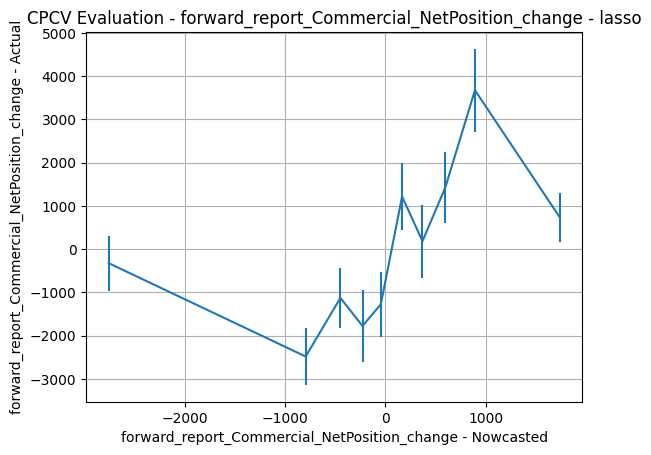

ridge: score=0.1443, params={'model': 'ridge', 'alpha': 906.6118860721004}
{'alpha': 906.6118860721004}


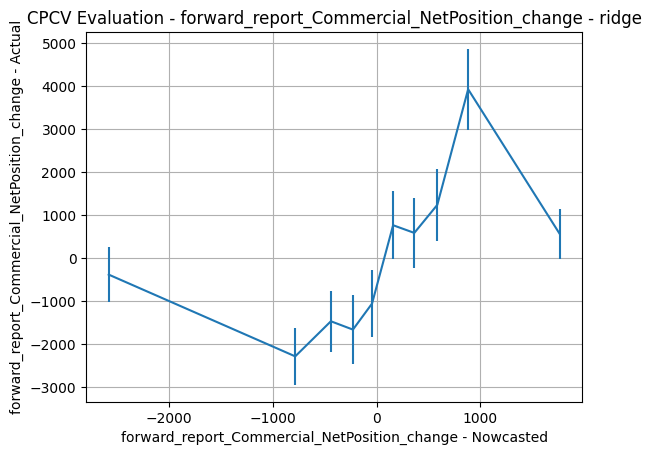

rf: score=0.1971, params={'model': 'rf', 'n_estimators': 200, 'max_depth': 10, 'min_samples_leaf': 1, 'max_features': 'log2'}
{'n_estimators': 200, 'max_depth': 10, 'min_samples_leaf': 1, 'max_features': 'log2'}


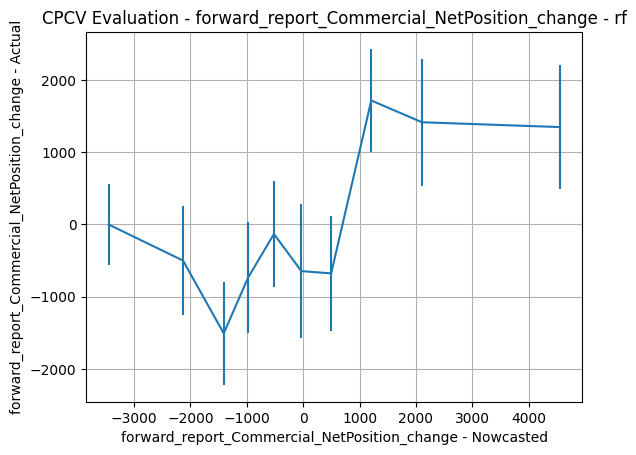

hgbm: score=0.1816, params={'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}
{'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}


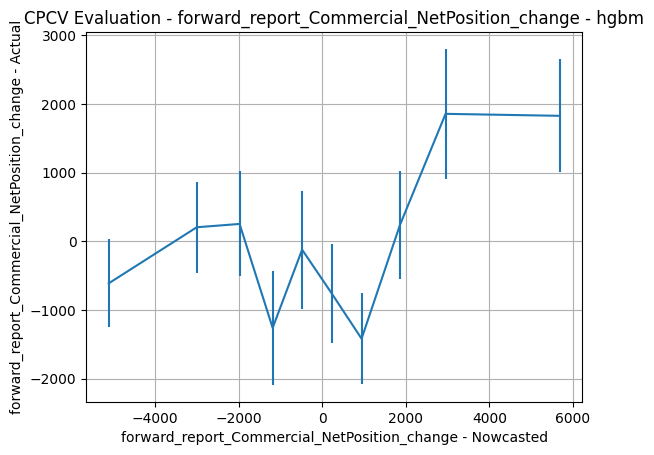

ols: score=0.1521, params={'model': 'ols'}
{}


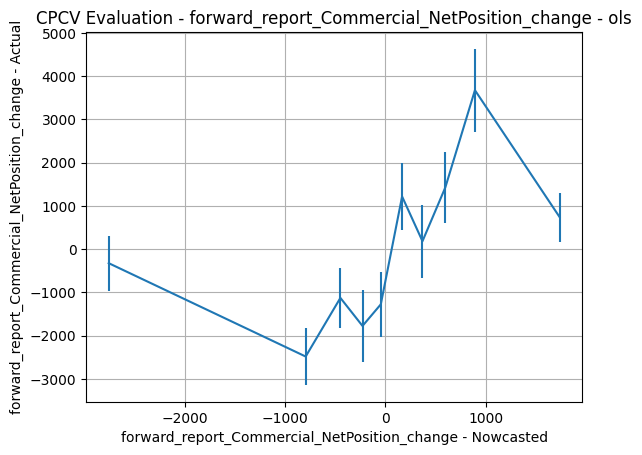

enet: score=-0.0027, params={'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}
{'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}


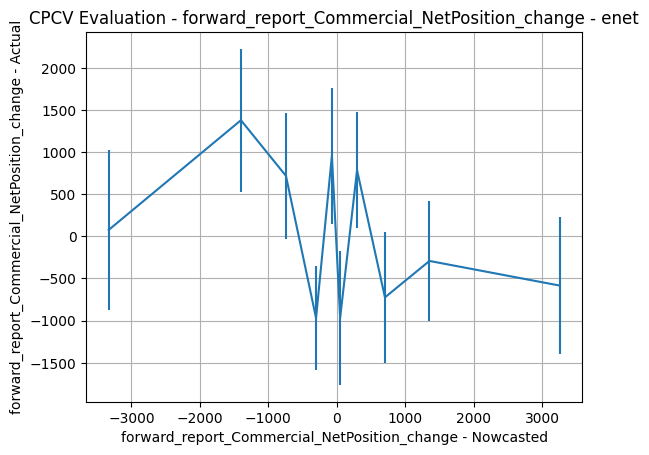

extra: score=0.1476, params={'model': 'extra', 'n_estimators': 200, 'max_depth': 6, 'min_samples_leaf': 7, 'max_features': 'log2'}
{'n_estimators': 200, 'max_depth': 6, 'min_samples_leaf': 7, 'max_features': 'log2'}


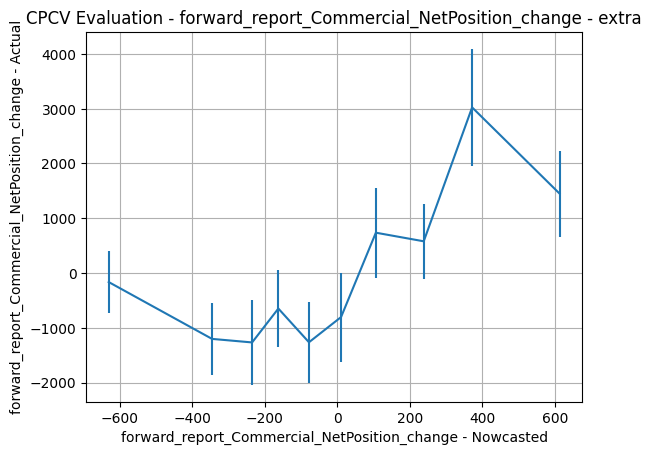

forward_report_CommercialLongPosition_change
lasso: score=0.1756, params={'model': 'lasso', 'alpha': 6.853298554875743e-05}
{'alpha': 6.853298554875743e-05}


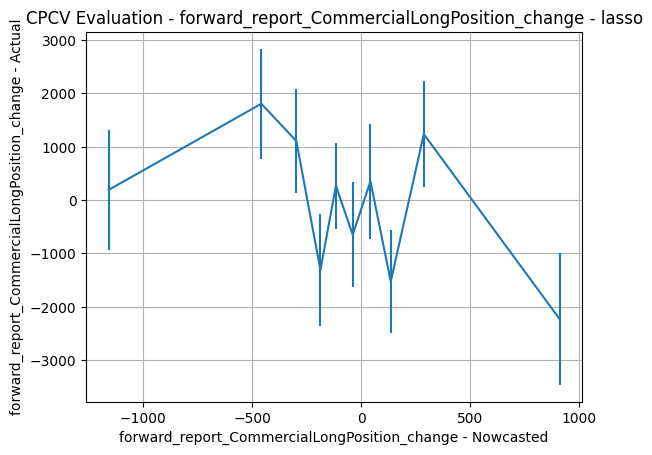

ridge: score=0.1756, params={'model': 'ridge', 'alpha': 4.473429410462694e-05}
{'alpha': 4.473429410462694e-05}


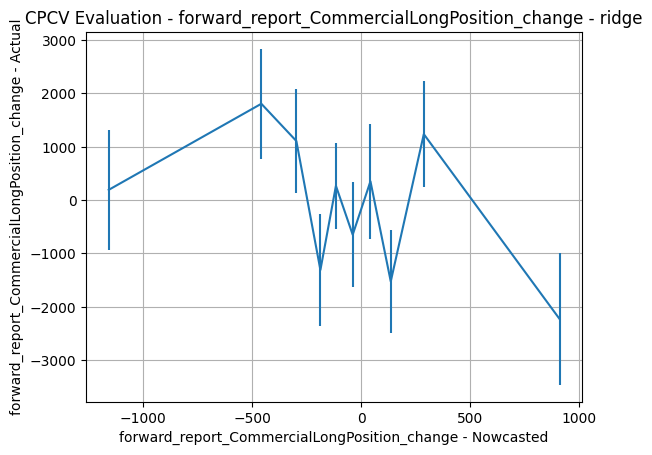

rf: score=0.1688, params={'model': 'rf', 'n_estimators': 400, 'max_depth': 25, 'min_samples_leaf': 7, 'max_features': 'sqrt'}
{'n_estimators': 400, 'max_depth': 25, 'min_samples_leaf': 7, 'max_features': 'sqrt'}


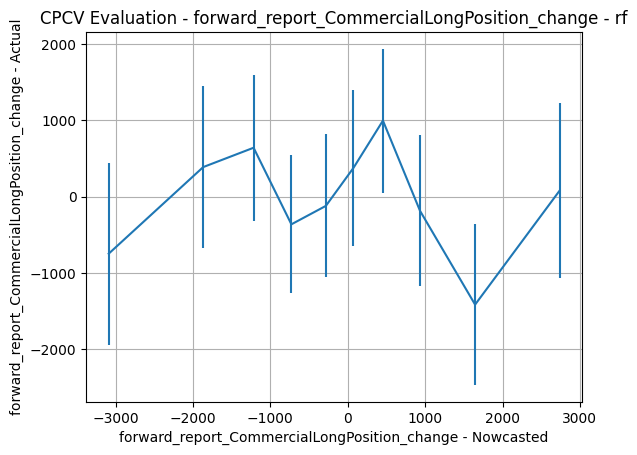

hgbm: score=0.1057, params={'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}
{'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}


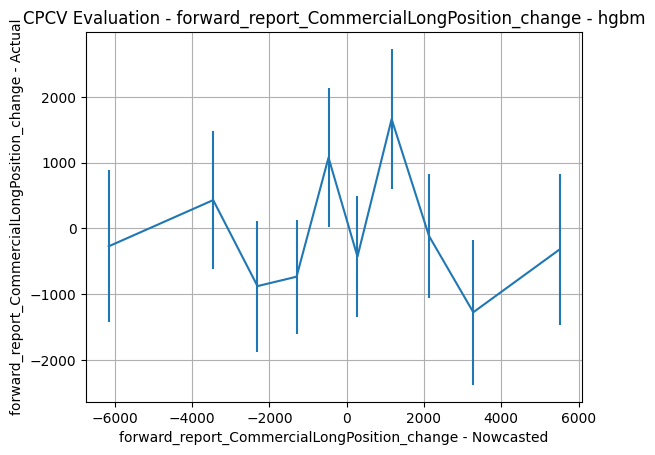

ols: score=0.1756, params={'model': 'ols'}
{}


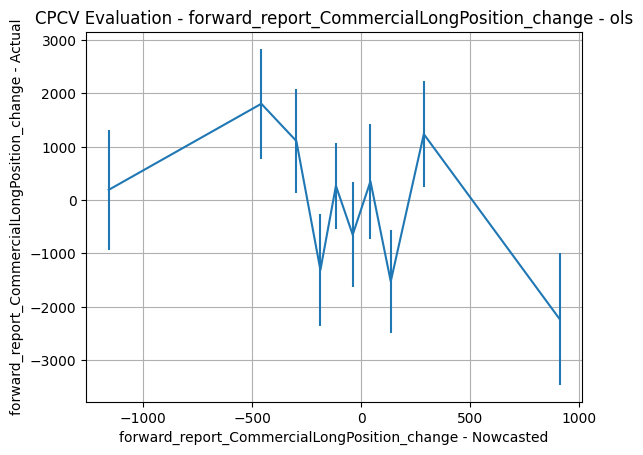

enet: score=0.0048, params={'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}
{'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}


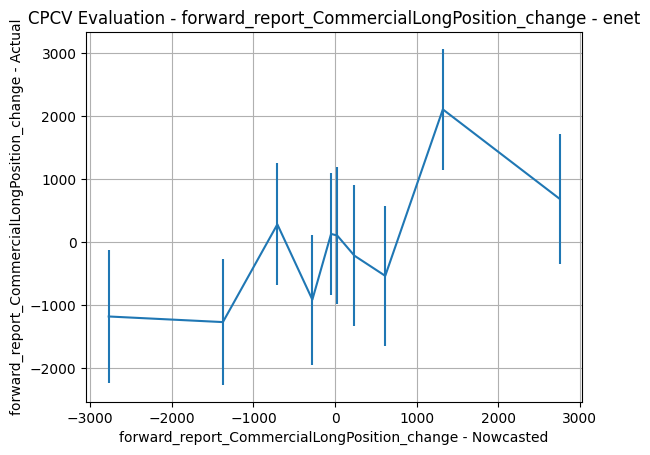

extra: score=0.1350, params={'model': 'extra', 'n_estimators': 1200, 'max_depth': 29, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
{'n_estimators': 1200, 'max_depth': 29, 'min_samples_leaf': 1, 'max_features': 'sqrt'}


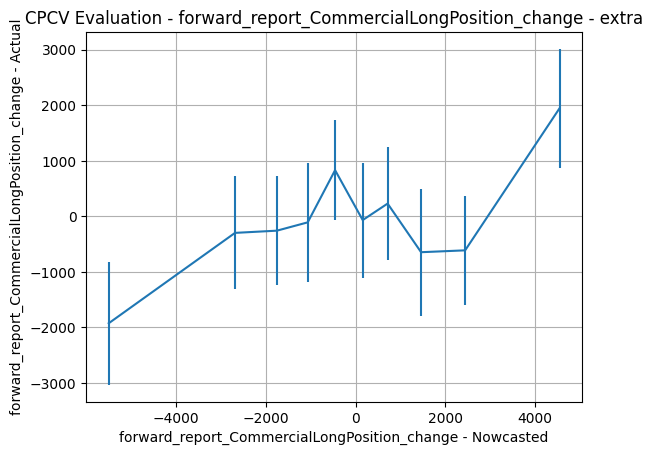

forward_report_CommercialShortPosition_change
lasso: score=0.1352, params={'model': 'lasso', 'alpha': 9.714586134002047}
{'alpha': 9.714586134002047}


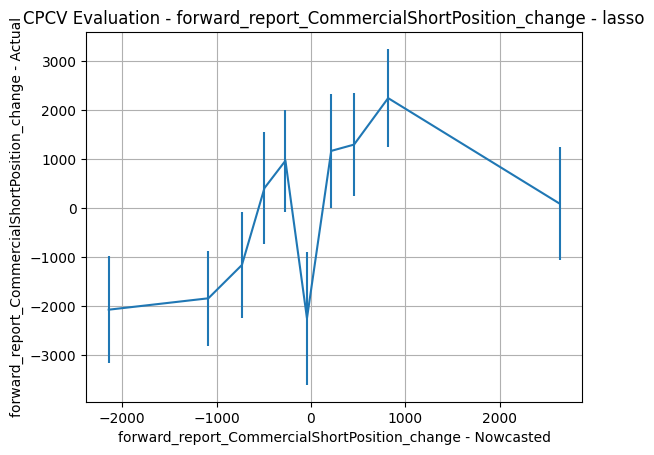

ridge: score=0.1356, params={'model': 'ridge', 'alpha': 4.473429410462694e-05}
{'alpha': 4.473429410462694e-05}


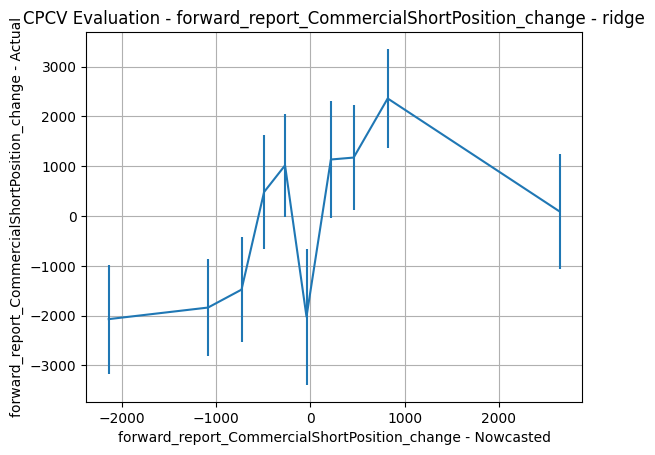

rf: score=0.1878, params={'model': 'rf', 'n_estimators': 200, 'max_depth': 23, 'min_samples_leaf': 10, 'max_features': 'sqrt'}
{'n_estimators': 200, 'max_depth': 23, 'min_samples_leaf': 10, 'max_features': 'sqrt'}


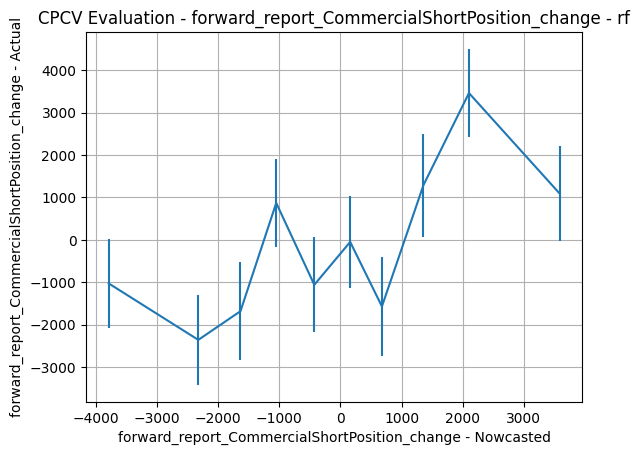

hgbm: score=0.1474, params={'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}
{'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}


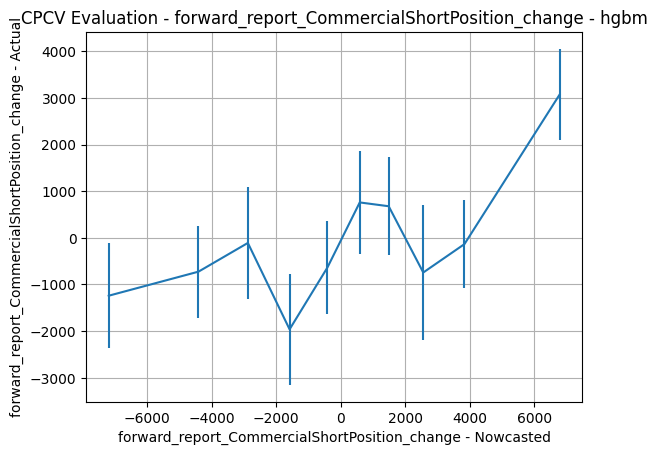

ols: score=0.1356, params={'model': 'ols'}
{}


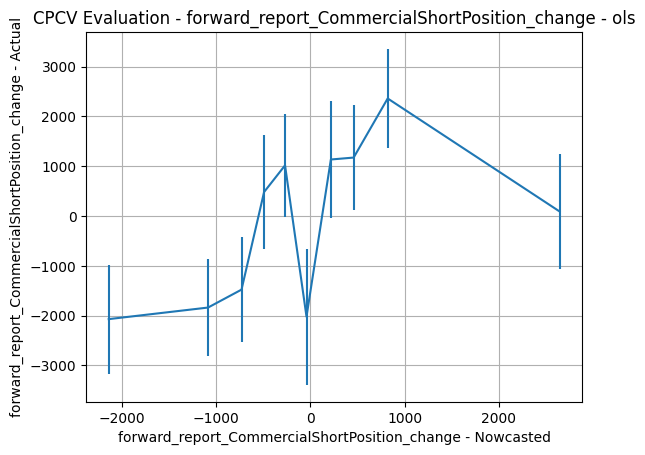

enet: score=-0.0296, params={'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}
{'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}


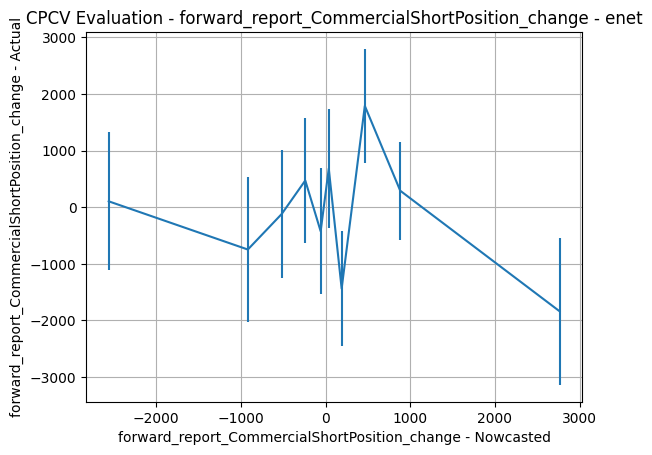

extra: score=0.1721, params={'model': 'extra', 'n_estimators': 600, 'max_depth': 19, 'min_samples_leaf': 5, 'max_features': 'sqrt'}
{'n_estimators': 600, 'max_depth': 19, 'min_samples_leaf': 5, 'max_features': 'sqrt'}


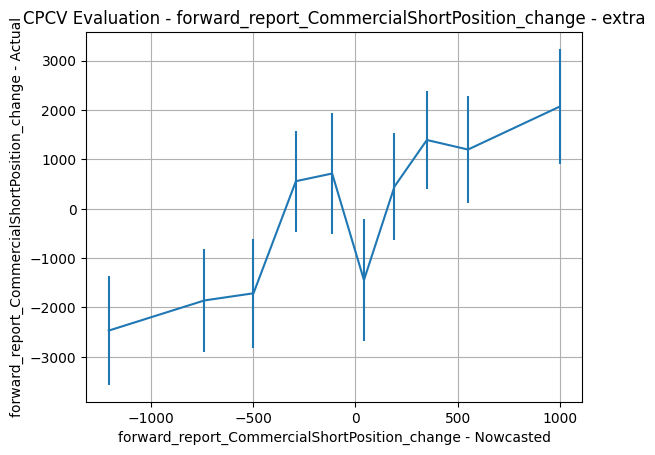

forward_Commercial_NetPosition_to_openinterest_change
lasso: score=-0.0436, params={'model': 'lasso', 'alpha': 1.156732719914599}
{'alpha': 1.156732719914599}


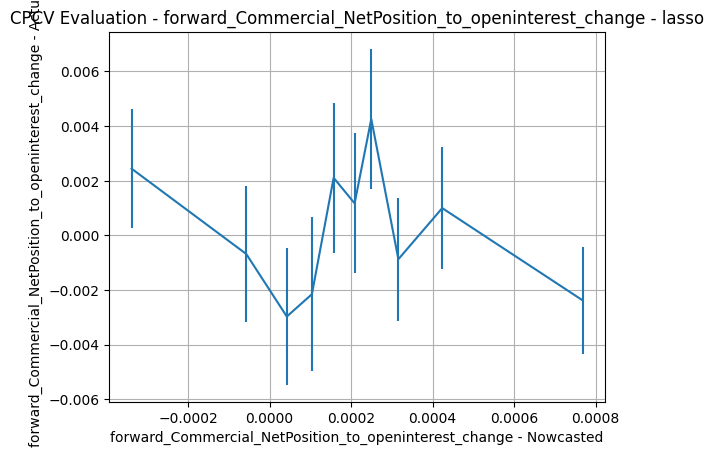

ridge: score=0.2070, params={'model': 'ridge', 'alpha': 1.2391844377699232e-06}
{'alpha': 1.2391844377699232e-06}


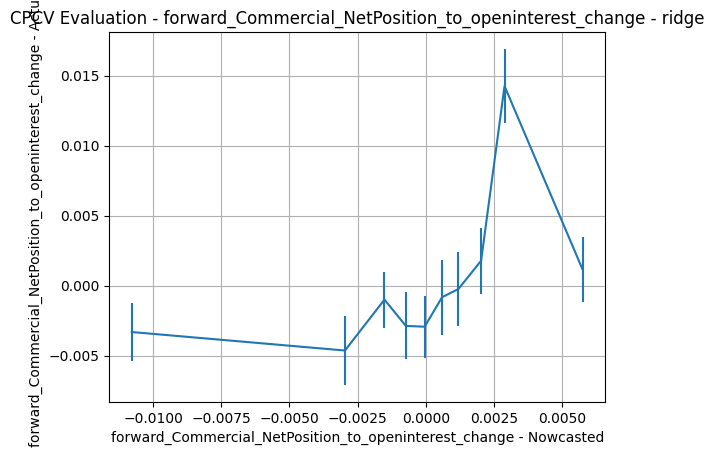

rf: score=0.1668, params={'model': 'rf', 'n_estimators': 1000, 'max_depth': 15, 'min_samples_leaf': 1, 'max_features': 'log2'}
{'n_estimators': 1000, 'max_depth': 15, 'min_samples_leaf': 1, 'max_features': 'log2'}


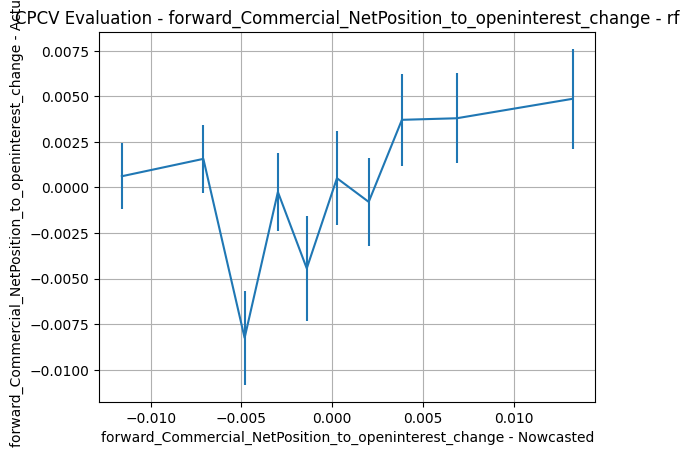

hgbm: score=0.0820, params={'model': 'hgbm', 'learning_rate': 0.29899808614347523, 'max_depth': 10, 'max_iter': 400, 'l2_regularization': 0.547445763496463, 'max_leaf_nodes': 243}
{'learning_rate': 0.29899808614347523, 'max_depth': 10, 'max_iter': 400, 'l2_regularization': 0.547445763496463, 'max_leaf_nodes': 243}


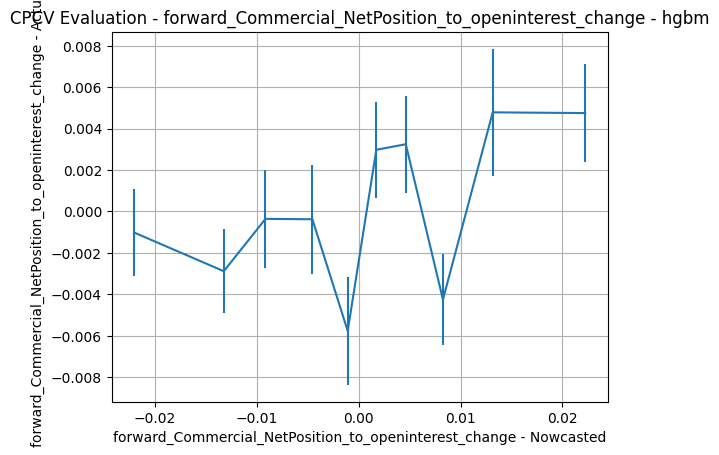

ols: score=0.2070, params={'model': 'ols'}
{}


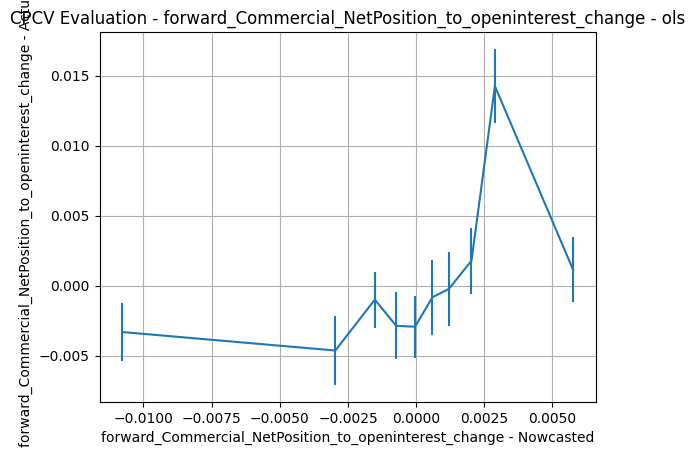

enet: score=-0.0403, params={'model': 'enet', 'alpha': 0.03756854400995655, 'l1_ratio': 0.9088868831774647, 'loss': 'squared_error'}
{'alpha': 0.03756854400995655, 'l1_ratio': 0.9088868831774647, 'loss': 'squared_error'}


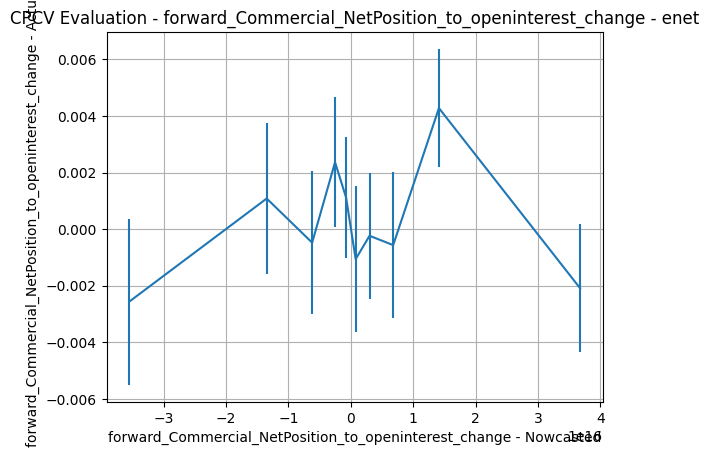

extra: score=0.1456, params={'model': 'extra', 'n_estimators': 1200, 'max_depth': 29, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
{'n_estimators': 1200, 'max_depth': 29, 'min_samples_leaf': 1, 'max_features': 'sqrt'}


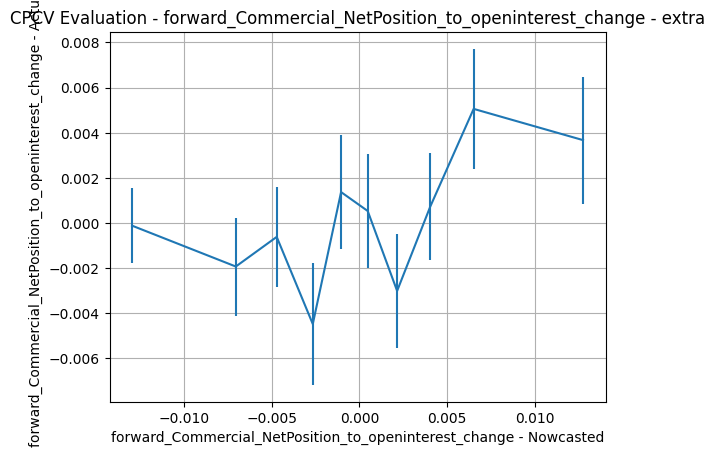

forward_CommercialLongPosition_to_openinterest_change
lasso: score=-0.0286, params={'model': 'lasso', 'alpha': 1.156732719914599}
{'alpha': 1.156732719914599}


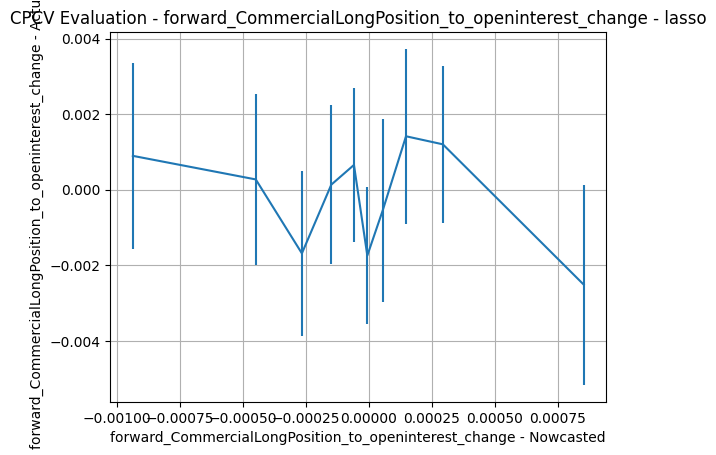

ridge: score=0.1351, params={'model': 'ridge', 'alpha': 903.5116522745155}
{'alpha': 903.5116522745155}


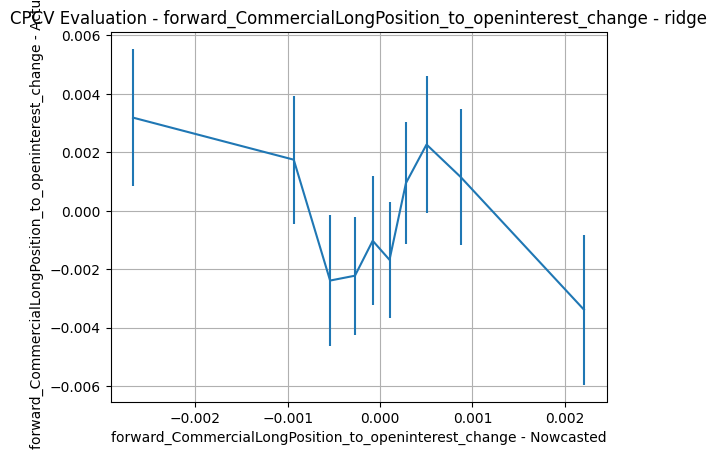

rf: score=0.0864, params={'model': 'rf', 'n_estimators': 1000, 'max_depth': 25, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
{'n_estimators': 1000, 'max_depth': 25, 'min_samples_leaf': 1, 'max_features': 'sqrt'}


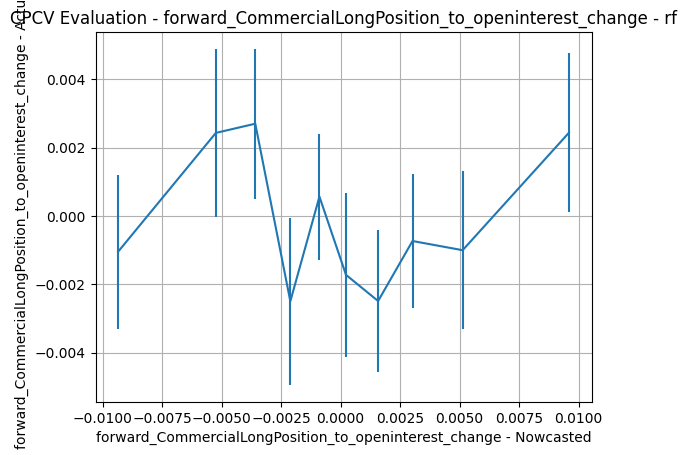

hgbm: score=0.0660, params={'model': 'hgbm', 'learning_rate': 0.29899808614347523, 'max_depth': 7, 'max_iter': 400, 'l2_regularization': 0.4347955655572818, 'max_leaf_nodes': 243}
{'learning_rate': 0.29899808614347523, 'max_depth': 7, 'max_iter': 400, 'l2_regularization': 0.4347955655572818, 'max_leaf_nodes': 243}


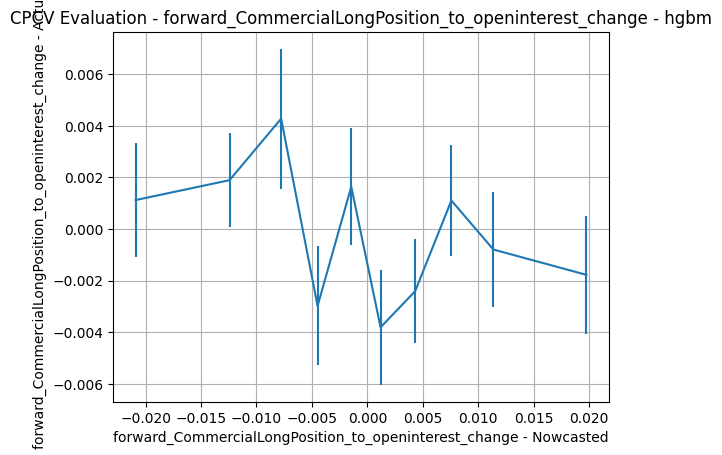

ols: score=0.1510, params={'model': 'ols'}
{}


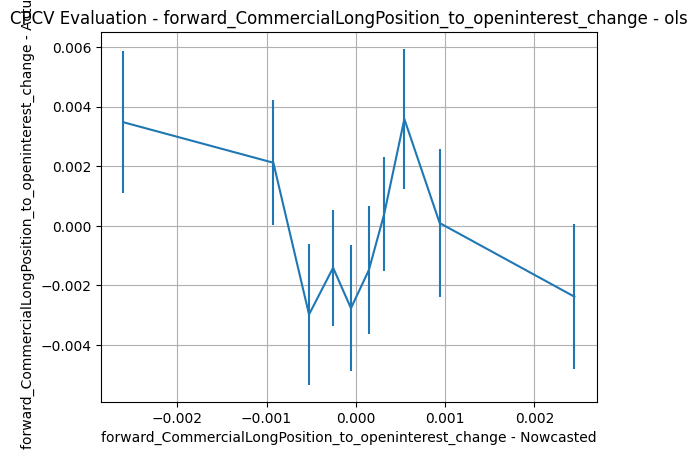

enet: score=-0.0123, params={'model': 'enet', 'alpha': 0.056798785908049744, 'l1_ratio': 0.9608771169328997, 'loss': 'huber', 'epsilon': 0.18882929460416004}
{'alpha': 0.056798785908049744, 'l1_ratio': 0.9608771169328997, 'loss': 'huber', 'epsilon': 0.18882929460416004}


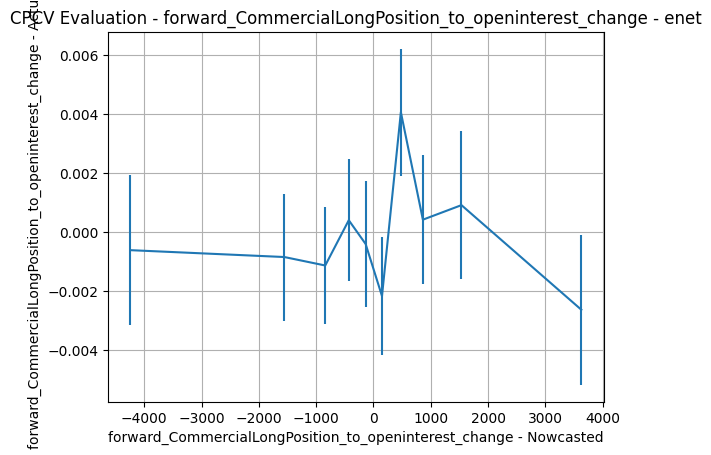

extra: score=0.0688, params={'model': 'extra', 'n_estimators': 1200, 'max_depth': 29, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
{'n_estimators': 1200, 'max_depth': 29, 'min_samples_leaf': 1, 'max_features': 'sqrt'}


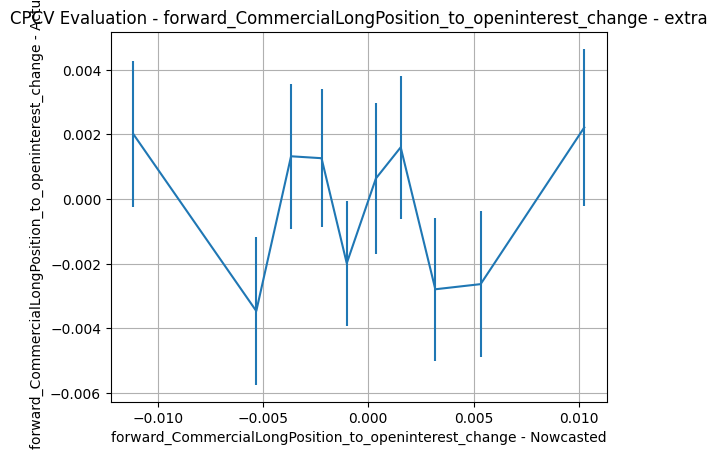

forward_CommercialShortPosition_to_openinterest_change
lasso: score=-0.0525, params={'model': 'lasso', 'alpha': 1.156732719914599}
{'alpha': 1.156732719914599}


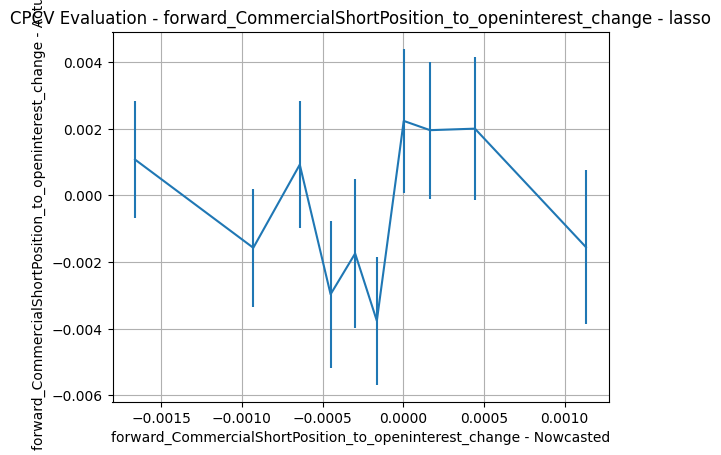

ridge: score=0.0979, params={'model': 'ridge', 'alpha': 933.6044419798662}
{'alpha': 933.6044419798662}


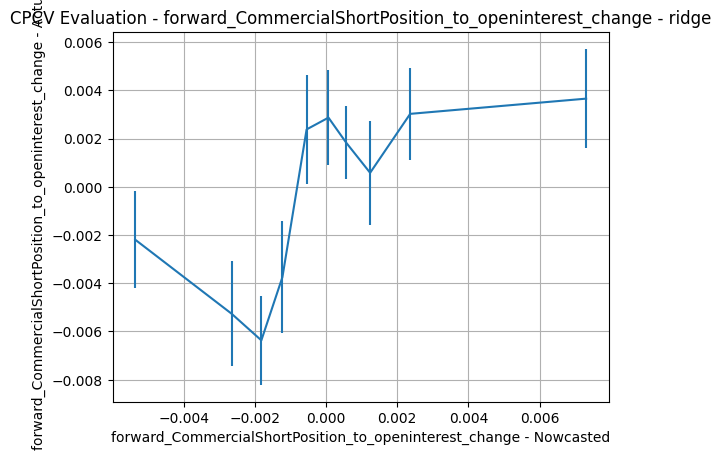

rf: score=0.1893, params={'model': 'rf', 'n_estimators': 200, 'max_depth': 24, 'min_samples_leaf': 6, 'max_features': 'sqrt'}
{'n_estimators': 200, 'max_depth': 24, 'min_samples_leaf': 6, 'max_features': 'sqrt'}


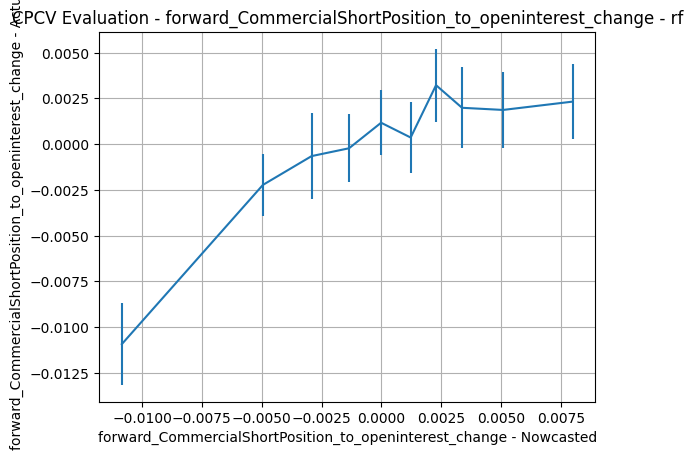

hgbm: score=0.1797, params={'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}
{'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}


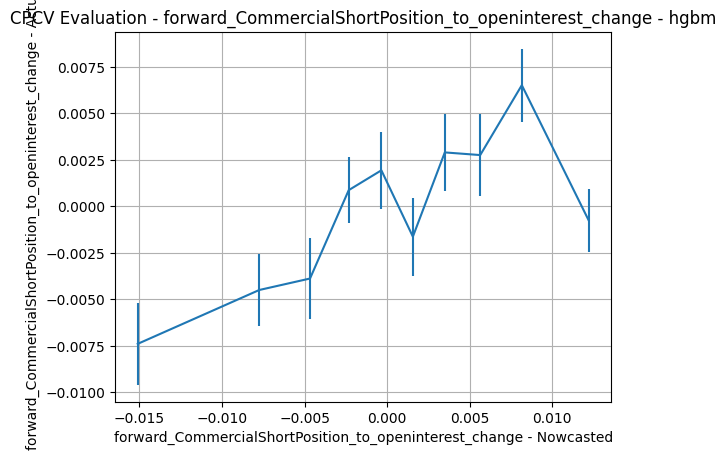

ols: score=0.0997, params={'model': 'ols'}
{}


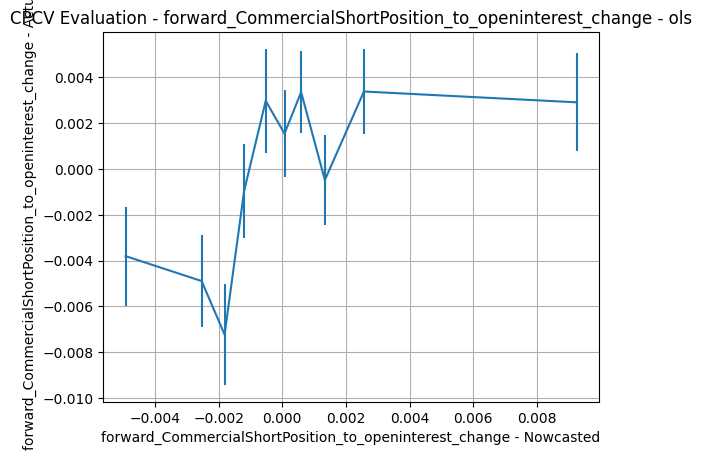

enet: score=-0.0493, params={'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}
{'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}


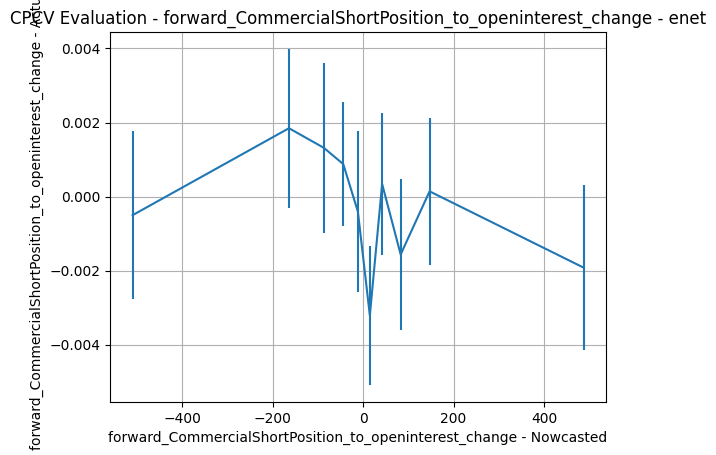

extra: score=0.1031, params={'model': 'extra', 'n_estimators': 1200, 'max_depth': 3, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
{'n_estimators': 1200, 'max_depth': 3, 'min_samples_leaf': 1, 'max_features': 'sqrt'}


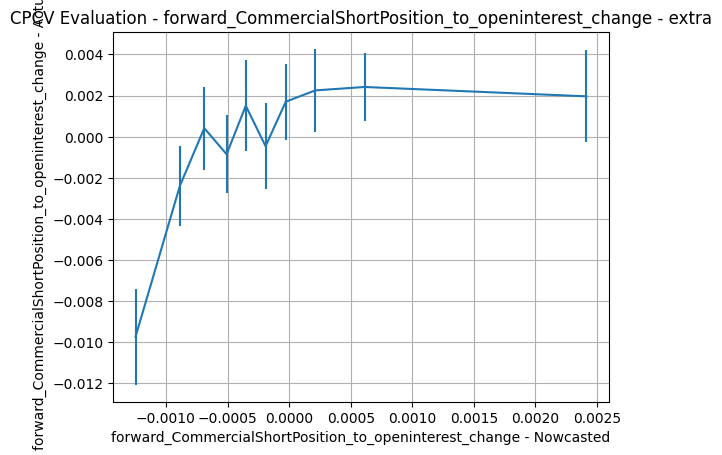

In [36]:
response_performance_map = {}
for response_name , best_model in responses_best_model.items():
    print(response_name)
    best_per_model = responses_best_per_model[response_name]
    response_performance_trail = {}
    for model_name, info in best_per_model.items():
        print(f"{model_name}: score={info['score']:.4f}, params={info['params']}")
        params = copy.deepcopy(info['params'])
        del params['model']
        print(params)
        # estimator = estimators_[model_name.lower()](**params) 

        if model_name == "enet": 
            estimator = SGDRegressor(**params)
        elif model_name == "lasso": 
            estimator = Lasso(**params)
        elif model_name == "ols": 
            estimator = LinearRegression()
        elif model_name == "ridge": 
            estimator = Ridge(**params)
        elif  model_name == "rf": 
            estimator = RandomForestRegressor(**params)
        elif model_name == "extra":
            estimator = ExtraTreesRegressor(**params)
        elif model_name == "hgbm":
            estimator = HistGradientBoostingRegressor(**params)
        

        Xy = dataset[['tradeDate']+feature_names+[response_name]].dropna()
        Xy.reset_index(drop=True, inplace= True)
        yhat = cpcv_predict( estimator ,
                             Xy[feature_names],
                             Xy[response_name],
                             cv=cv,
                                method = 'predict',
                                n_jobs=10)
        response_performance_trail[model_name] = np.corrcoef(yhat,  Xy[response_name])[0,1]
        _=plot_bin_summary_of_xy(
                    x = yhat,
                    y = Xy[response_name],
                    k= 10 )
        plt.xlabel(f'{response_name} - Nowcasted')
        plt.ylabel(f'{response_name} - Actual')
        plt.grid()
        plt.title(f'CPCV Evaluation - {response_name} - {model_name}')
        plt.show()
        plt.close()
    response_performance_map[response_name] = response_performance_trail
        
        

In [37]:
pd.DataFrame(response_performance_map).T

,lasso,ridge,rf,hgbm,ols,enet,extra
forward_report_Commercial_NetPosition_change,0.086896,0.090034,0.128705,0.109733,0.086896,-0.063018,0.121937
forward_report_CommercialLongPosition_change,-0.079054,-0.079054,-0.027281,-0.010819,-0.079054,0.057143,0.069695
forward_report_CommercialShortPosition_change,0.039613,0.039433,0.101073,0.093848,0.039433,-0.051786,0.117681
forward_Commercial_NetPosition_to_openinterest_change,-0.044700,0.112853,0.108773,0.091272,0.112853,-0.007135,0.090366
forward_CommercialLongPosition_to_openinterest_change,-0.011028,-0.048947,-0.005413,-0.038779,-0.050583,-0.006330,0.013358
forward_CommercialShortPosition_to_openinterest_change,0.010537,0.106841,0.190750,0.179664,0.099736,-0.028868,0.104423


In [38]:
final_selected_model_per_response = dict(pd.DataFrame(response_performance_map).T.idxmax(axis=1))

In [39]:
final_selected_model_and_parameters_per_response = {}
for response_name , best_model_params in responses_best_per_model.items():
    print(response_name)
    best_model_name = final_selected_model_per_response[response_name]
    best_model_params = copy.deepcopy(best_model_params[best_model_name]['params'])
    del best_model_params['model']
    print(best_model_params)
    final_selected_model_and_parameters_per_response[response_name] = {
                    'model_name' : best_model_name, 
                    'params': best_model_params
        
    }
    

forward_report_Commercial_NetPosition_change
{'n_estimators': 200, 'max_depth': 10, 'min_samples_leaf': 1, 'max_features': 'log2'}
forward_report_CommercialLongPosition_change
{'n_estimators': 1200, 'max_depth': 29, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
forward_report_CommercialShortPosition_change
{'n_estimators': 600, 'max_depth': 19, 'min_samples_leaf': 5, 'max_features': 'sqrt'}
forward_Commercial_NetPosition_to_openinterest_change
{'alpha': 1.2391844377699232e-06}
forward_CommercialLongPosition_to_openinterest_change
{'n_estimators': 1200, 'max_depth': 29, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
forward_CommercialShortPosition_to_openinterest_change
{'n_estimators': 200, 'max_depth': 24, 'min_samples_leaf': 6, 'max_features': 'sqrt'}


In [40]:
final_selected_model_and_parameters_per_response

{'forward_report_Commercial_NetPosition_change': {'model_name': 'rf',
  'params': {'n_estimators': 200,
   'max_depth': 10,
   'min_samples_leaf': 1,
   'max_features': 'log2'}},
 'forward_report_CommercialLongPosition_change': {'model_name': 'extra',
  'params': {'n_estimators': 1200,
   'max_depth': 29,
   'min_samples_leaf': 1,
   'max_features': 'sqrt'}},
 'forward_report_CommercialShortPosition_change': {'model_name': 'extra',
  'params': {'n_estimators': 600,
   'max_depth': 19,
   'min_samples_leaf': 5,
   'max_features': 'sqrt'}},
 'forward_Commercial_NetPosition_to_openinterest_change': {'model_name': 'ridge',
  'params': {'alpha': 1.2391844377699232e-06}},
 'forward_CommercialLongPosition_to_openinterest_change': {'model_name': 'extra',
  'params': {'n_estimators': 1200,
   'max_depth': 29,
   'min_samples_leaf': 1,
   'max_features': 'sqrt'}},
 'forward_CommercialShortPosition_to_openinterest_change': {'model_name': 'rf',
  'params': {'n_estimators': 200,
   'max_depth': 24,

In [41]:
import json
with open("ho_cot_comm_forecast_selected_model_by_response.json", "w") as f:
    json.dump(final_selected_model_and_parameters_per_response, f)